In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
dataset = pd.read_csv('/content/day.csv', encoding= 'unicode_escape')

# **DATA INSPECTION**

In [4]:
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (730, 16) 
 Total Rows are : 730
 Total Columns are : 16


In [5]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
dataset.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
dataset.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
dataset.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,31-12-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


**OBSERVATIONS**

In [10]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
dataset.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [12]:
dataset['season'].value_counts()

,count
season,
3,188
2,184
1,180
4,178


In [13]:
dataset['holiday'].value_counts()

,count
holiday,
0,709
1,21


In [14]:
dataset['weekday'].value_counts()

,count
weekday,
6,105
0,105
1,105
2,104
4,104
5,104
3,103


In [15]:
dataset['workingday'].value_counts()

,count
workingday,
1,499
0,231


In [16]:
dataset['mnth'].value_counts()

,count
mnth,
1,62
3,62
7,62
5,62
12,62
10,62
8,62
4,60
9,60


In [17]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [18]:
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


In [19]:
dataset = dataset.drop('instant',axis=1)
print("Instant Column is dropped")

Instant Column is dropped


In [20]:
dataset = dataset.drop('dteday',axis=1)
print("dteday Colummn is dropped")

dteday Colummn is dropped


In [21]:
dataset.shape

(730, 14)

In [22]:
dataset.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985


# Exploratory Data Analysis

In [23]:
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
predictor_numeric = [c for c in numeric_cols if c != 'cnt']
if dataset[predictor_numeric].isna().sum().sum() > 0:
    for col in predictor_numeric:
        if dataset[col].isna().sum() > 0:
            dataset[col].fillna(dataset[col].median(), inplace=True)

In [24]:
# 3. Decide categorical vs numeric features
# Candidate categorical columns commonly in 'day' dataset:


candidate_cat = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
                 'year', 'mnth', 'is_weekend']
#Filter valid categorical columns from dataframe
categorical_cols = [c for c in candidate_cat if c in dataset.columns and dataset[c].dtype != 'float64']

#Verify categorical nature based on unique values
categorical_cols = [c for c in categorical_cols if dataset[c].nunique() <= 20]

# Numeric features: all numeric predictors excluding target and categorical cols
numeric_features = [c for c in predictor_numeric if c not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_features)

Categorical columns: ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']
Numeric columns: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


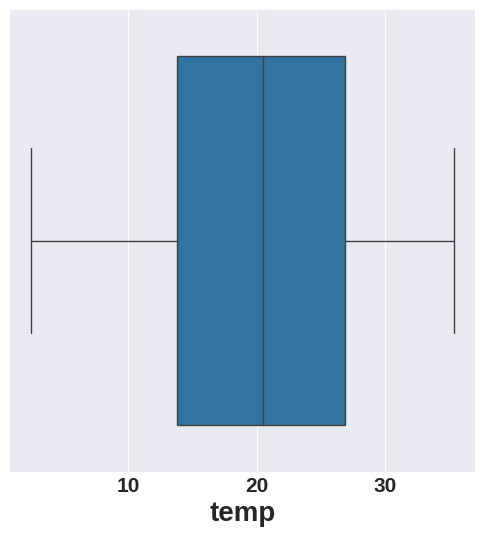

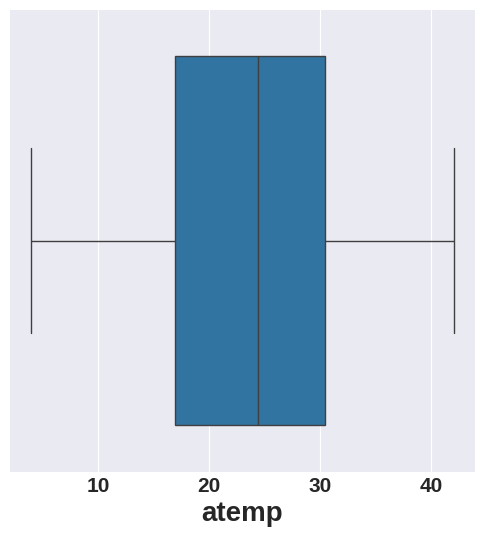

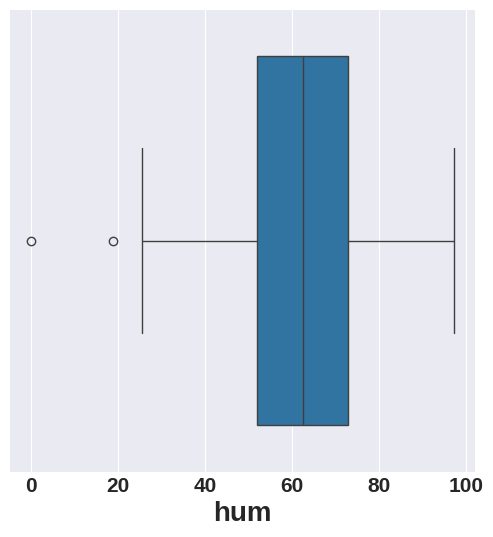

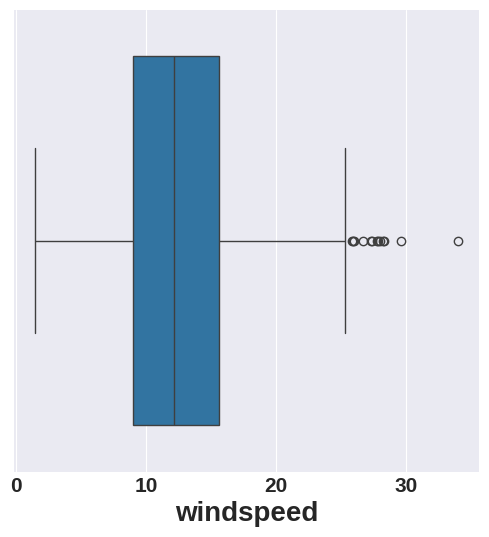

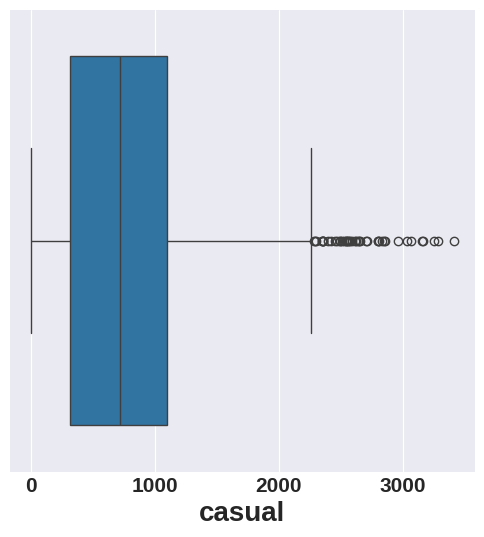

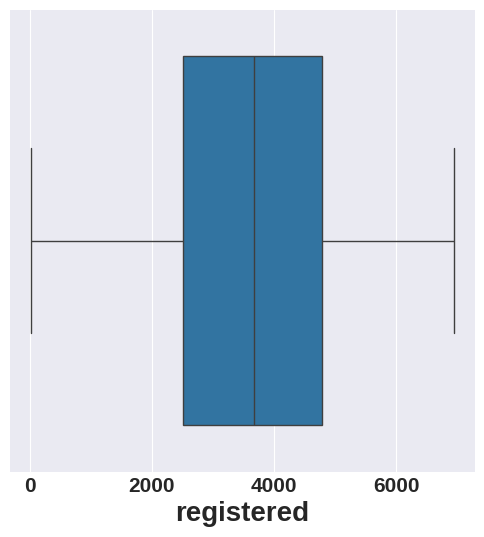

In [25]:
# Plotting box plot of numeric columns to check outliers
for col in numeric_features:
  fig = plt.figure(figsize = (6,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

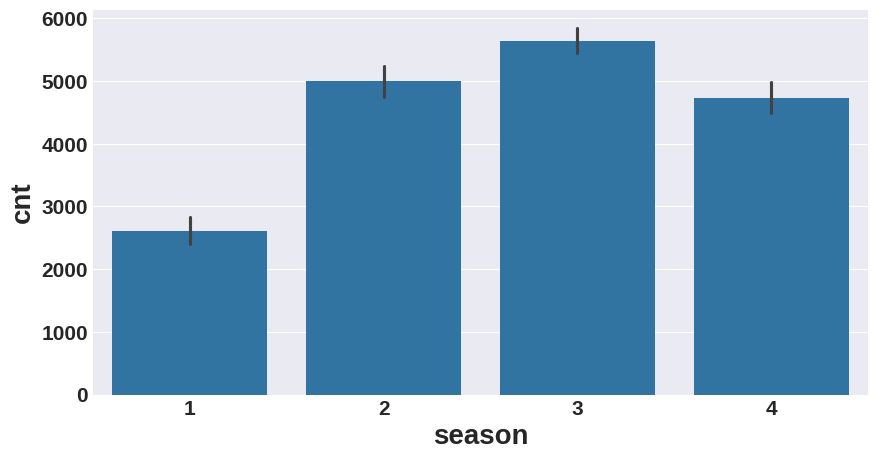

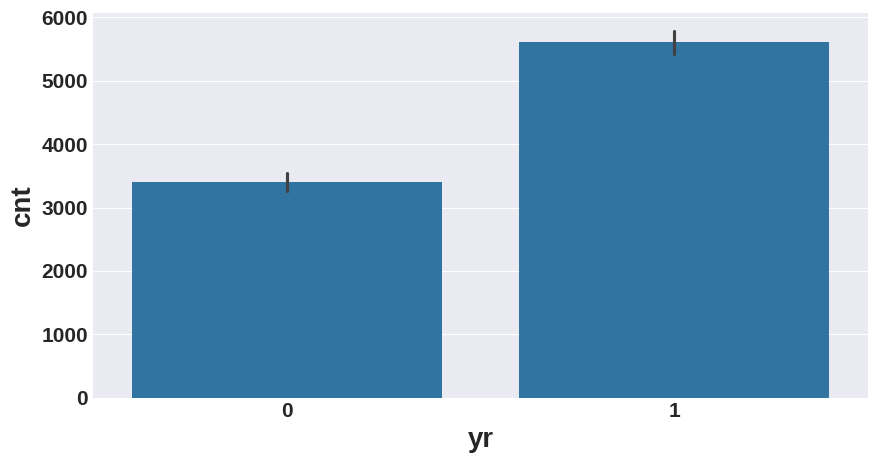

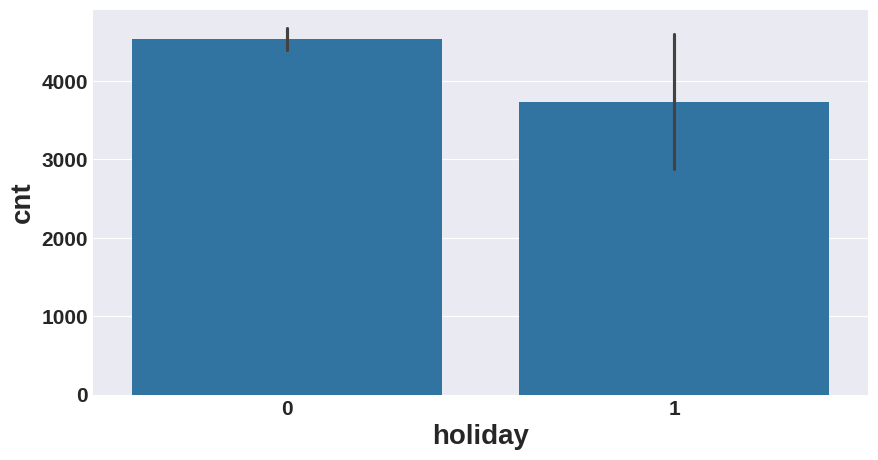

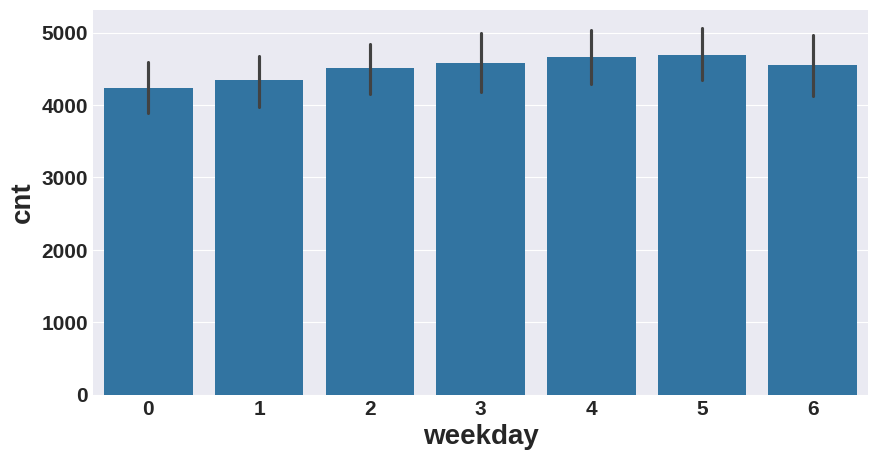

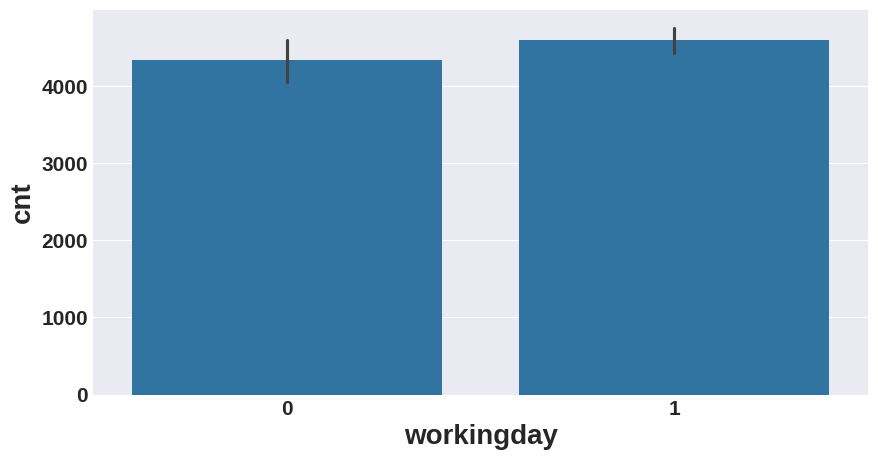

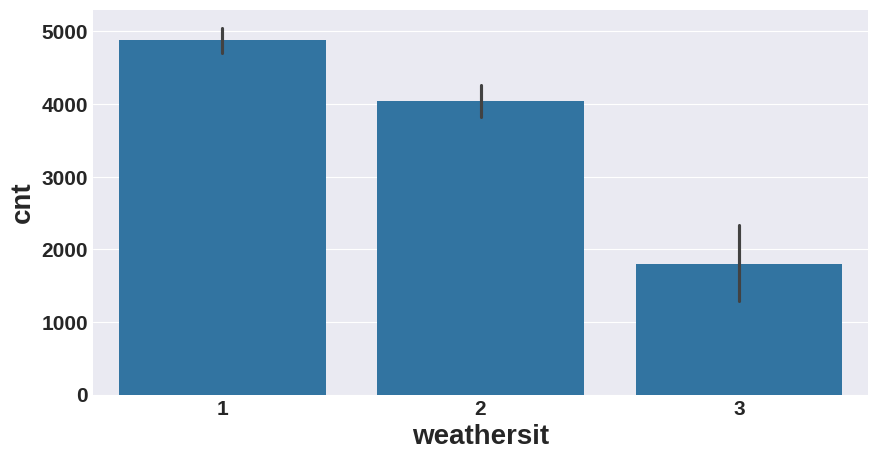

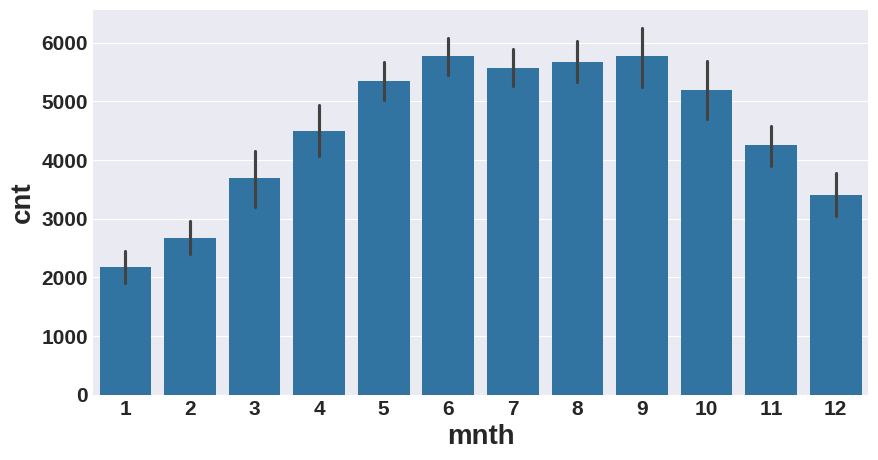

In [26]:
# Plot barchart plot for each categorical column with respect to target variable to get insights
for col in categorical_cols:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['cnt'])

# **Observations**
-> Most records belong to working days and clear weather condiitons, meaning people ride bikes more often when the weather is good and it's a regular weekday.     

-> The season-wise bars show higher counts during summer and fall, which indicates those seasons have more bike-sharing activity compared to winter or spring.

# Dependent Variable (cnt) Vs Categorical Columns

Text(0.5, 1.0, 'Bike Rental Trend according to month on Holiday / No Holiday')

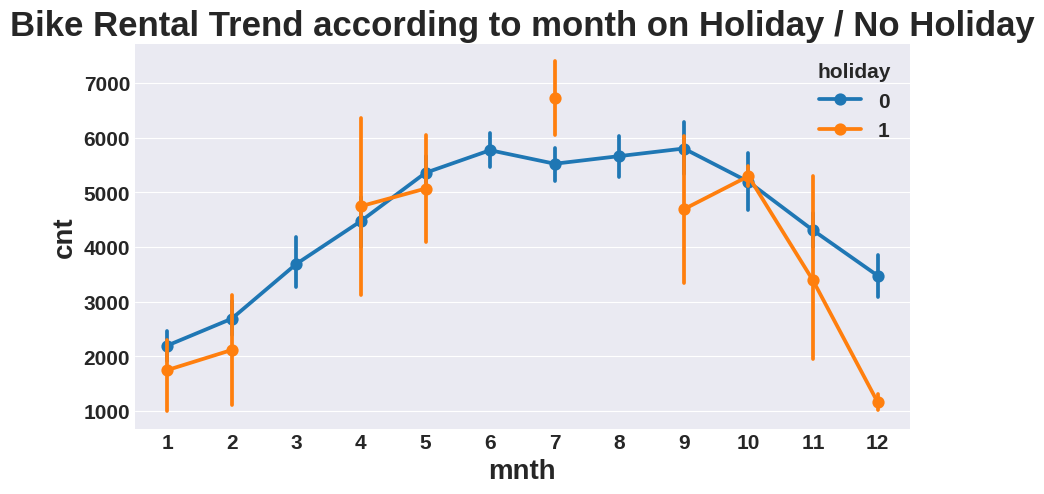

In [27]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['mnth'],y = dataset['cnt'],hue = dataset['holiday'])
plt.title("Bike Rental Trend according to month on Holiday / No Holiday")

-> Bike rentals increase from Jan to Jun-sep and drop after that. Non-holidays have higher demand than holidays.

Text(0.5, 1.0, 'Bike Rental Trend according to season on Workingday')

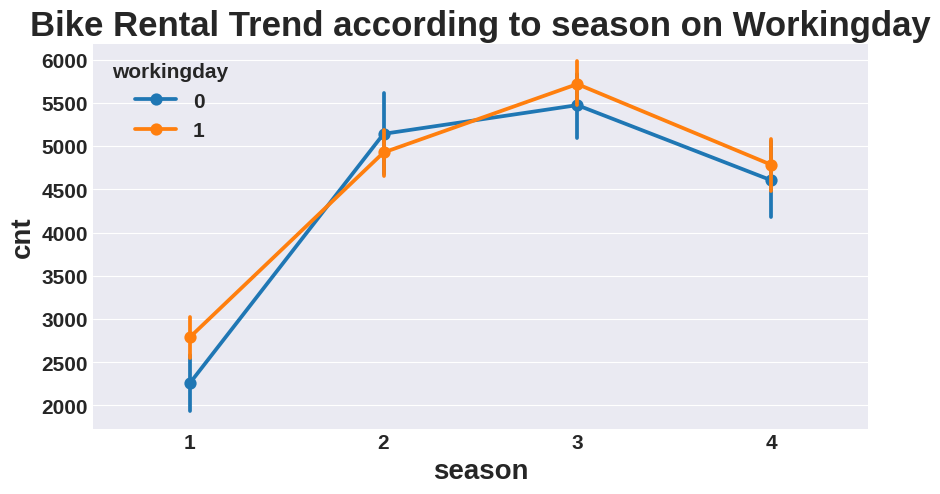

In [28]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['season'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to season on Workingday")

-> Summer & Fall seasons have the highest.

-> Working days > Non- working days in every season.

-> Indicates bike use mainly for daily commuting and good weather conditions.

Text(0.5, 1.0, 'Bike Rental Trend according to weekday on Working day or No working day')

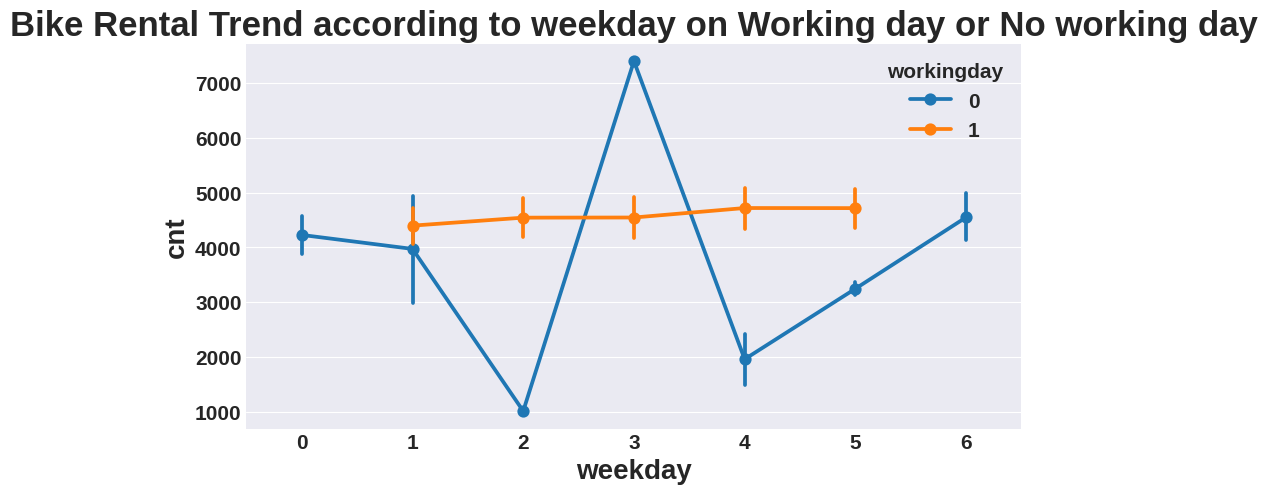

In [29]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to weekday on Working day or No working day")

-> Working days show consistent, higher rentals.

-> Non-working days show smaller peaks on weekends.

Text(0.5, 1.0, 'Bike Rental Trend according to weekday on season')

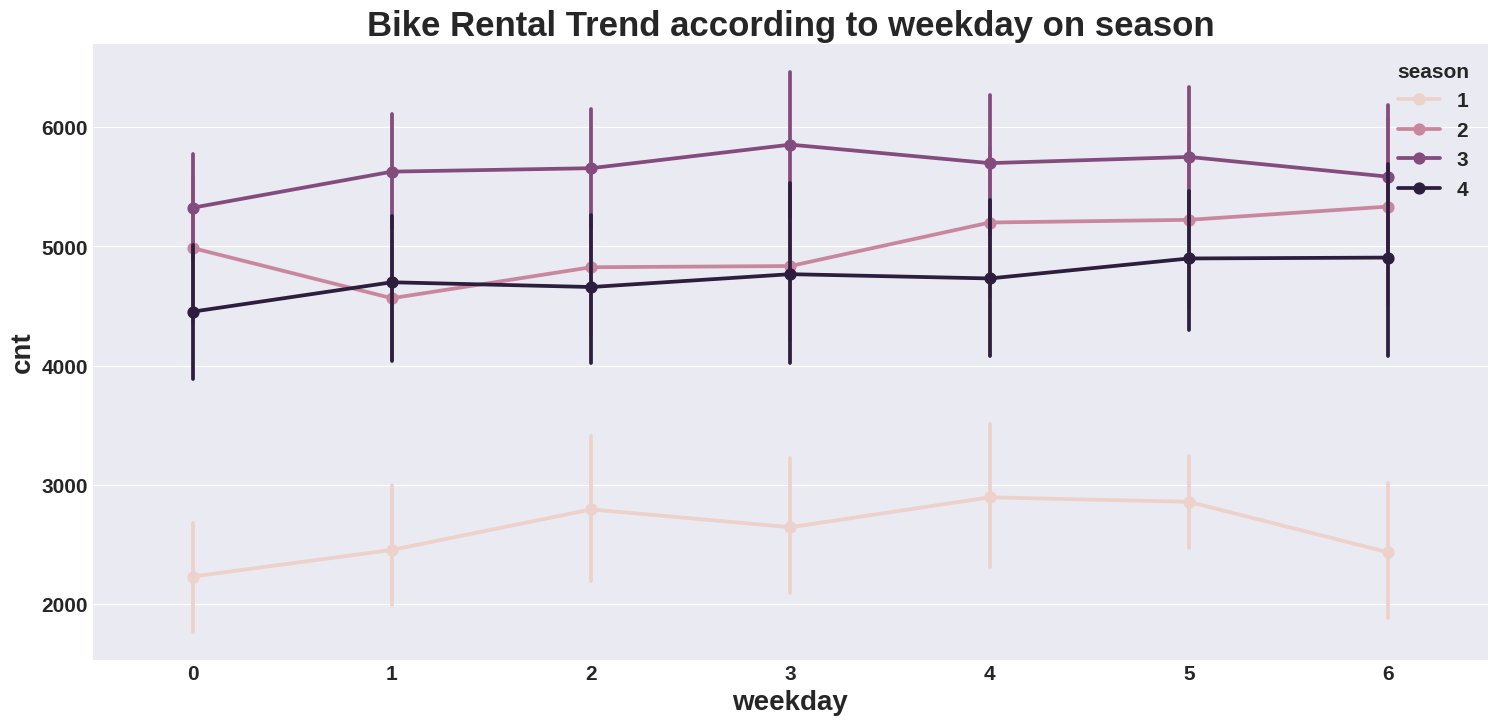

In [30]:
plt.figure(figsize=(18,8))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to weekday on season")

-> Rentals stay fairly stable across weekdays.

-> Slight increase on weekends, especially in Summer/Fall

Text(0.5, 1.0, 'Bike Rental Trend according to weathersit on season')

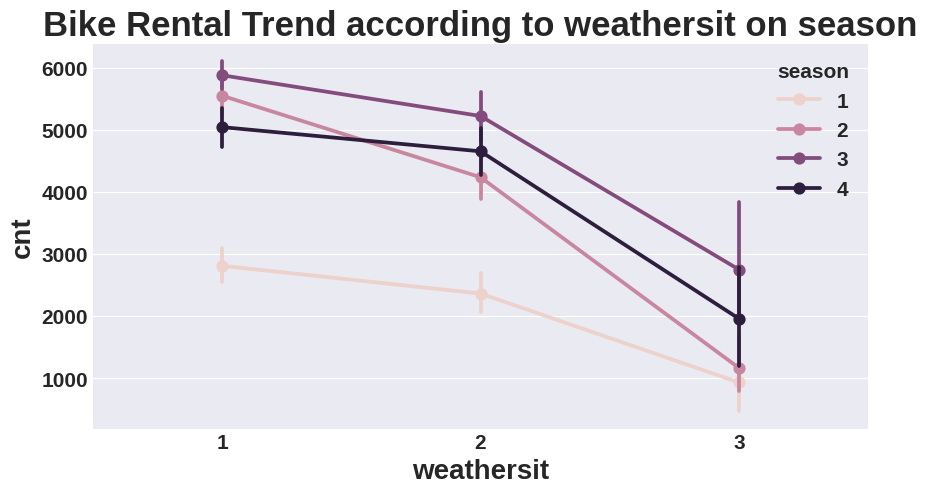

In [31]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['weathersit'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to weathersit on season")

-> Clear weather - highest rentals; Rain - lowest rentals

-> Bad weather decreases demand in all seasons.

-> Weather condition is a strong factor affecting rentals.

# Distrubion of Target Variable

<Axes: xlabel='cnt'>

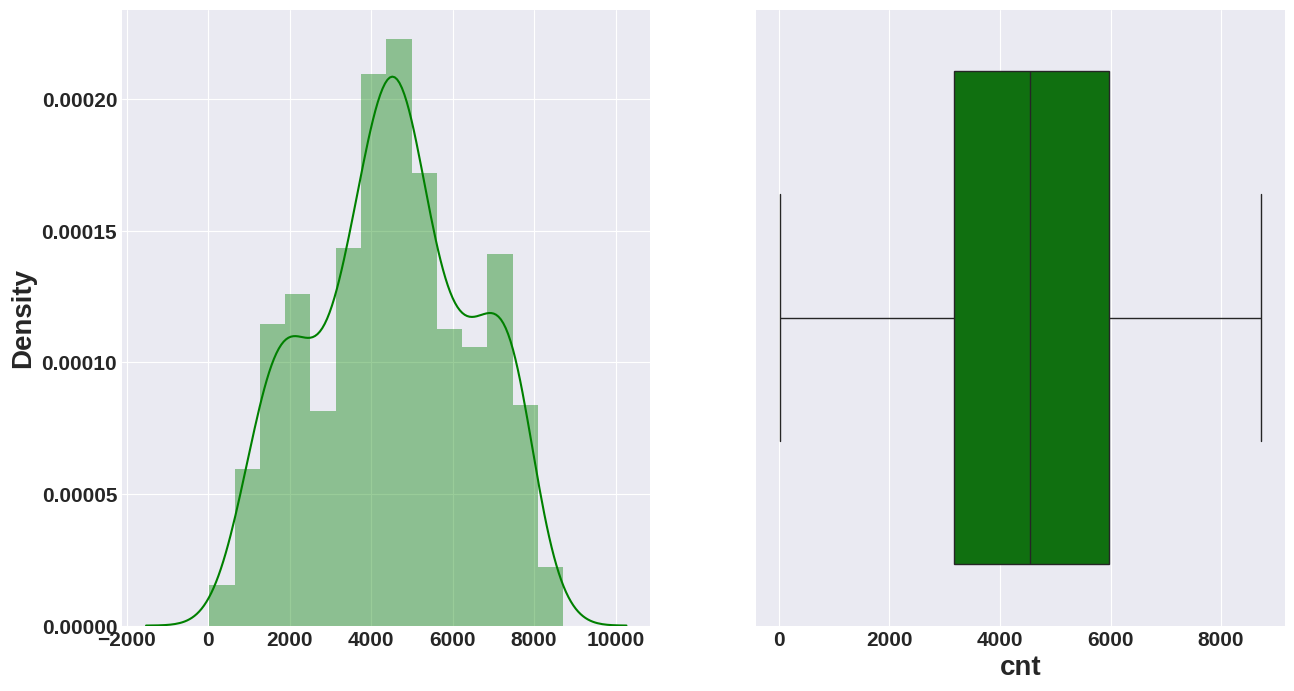

In [32]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= dataset['cnt'],color='g',ax=axes[0])
sns.boxplot(x = dataset['cnt'],color='g',ax=axes[1])

# Univariate Analysis

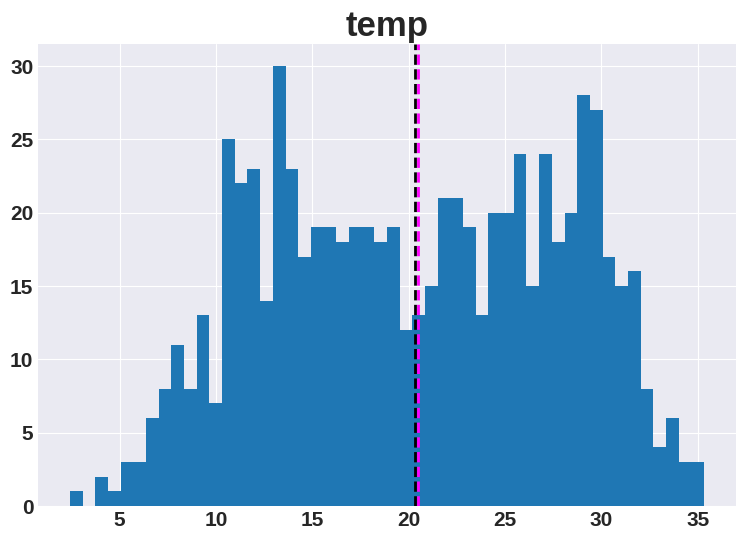

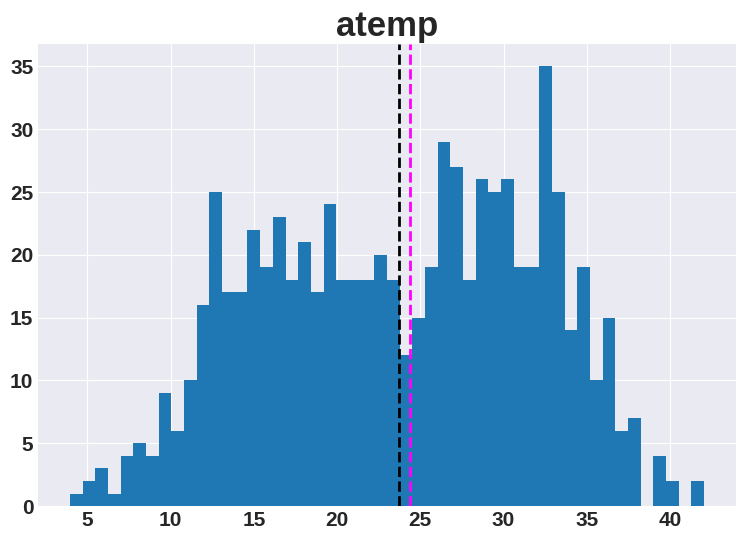

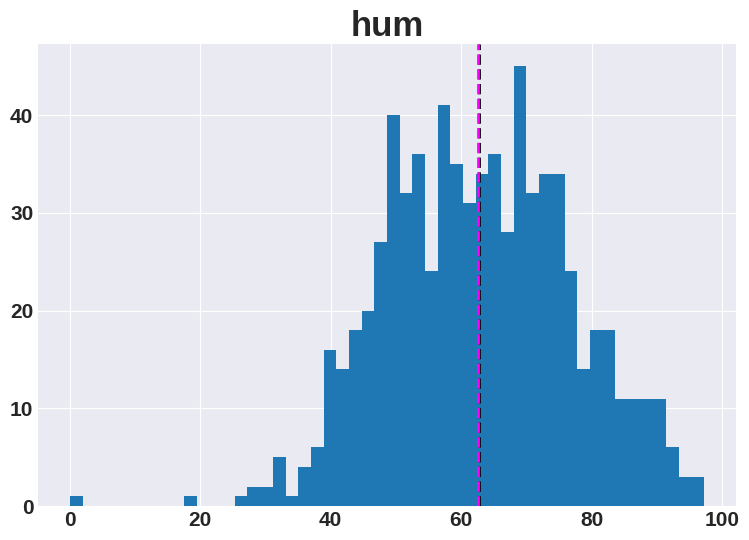

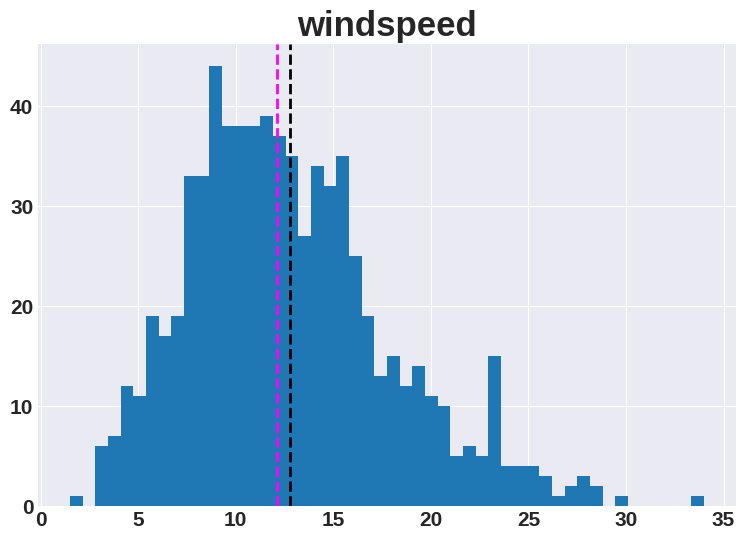

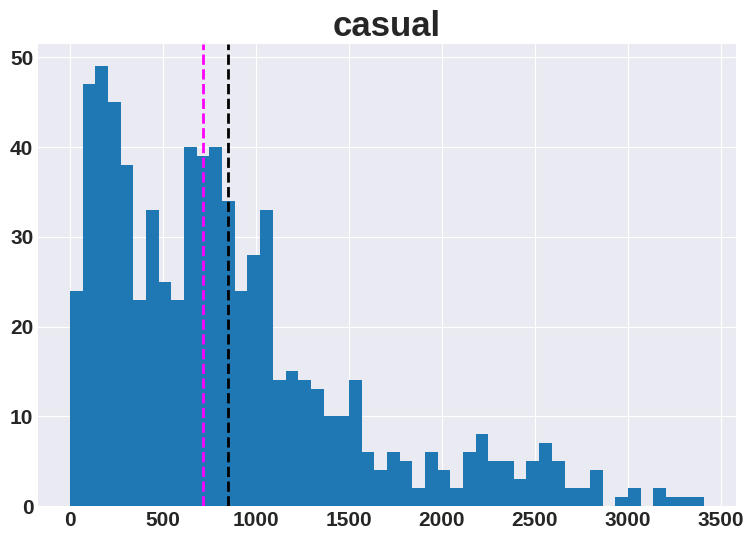

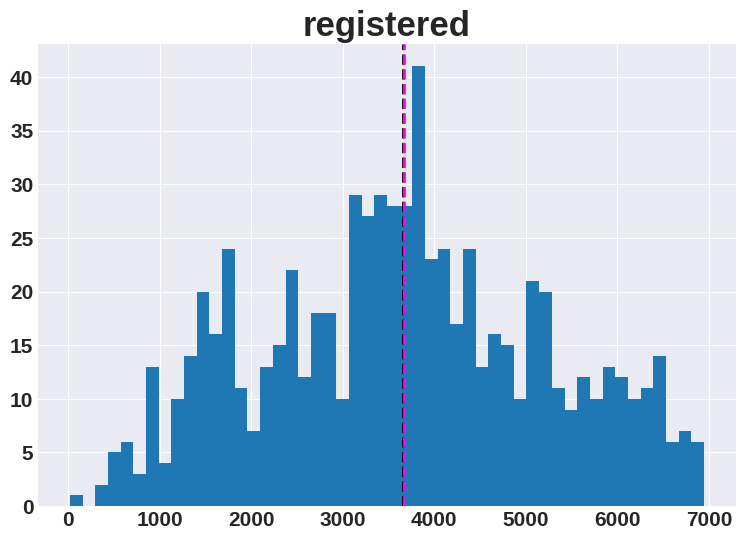

In [33]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

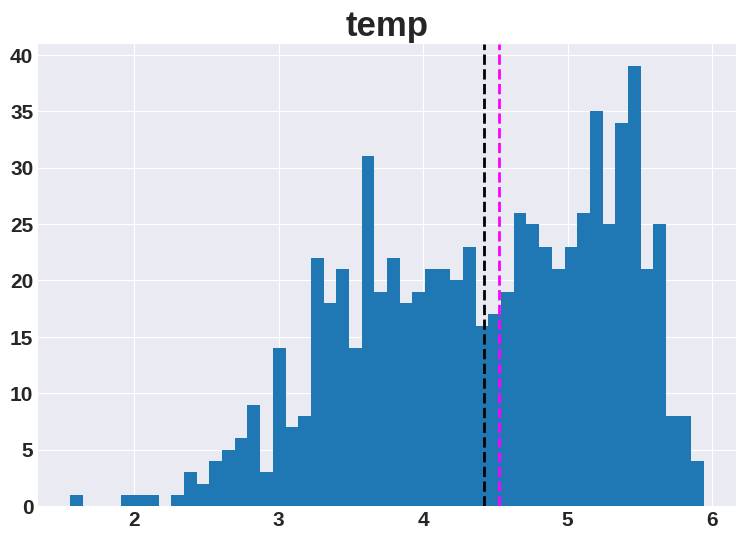

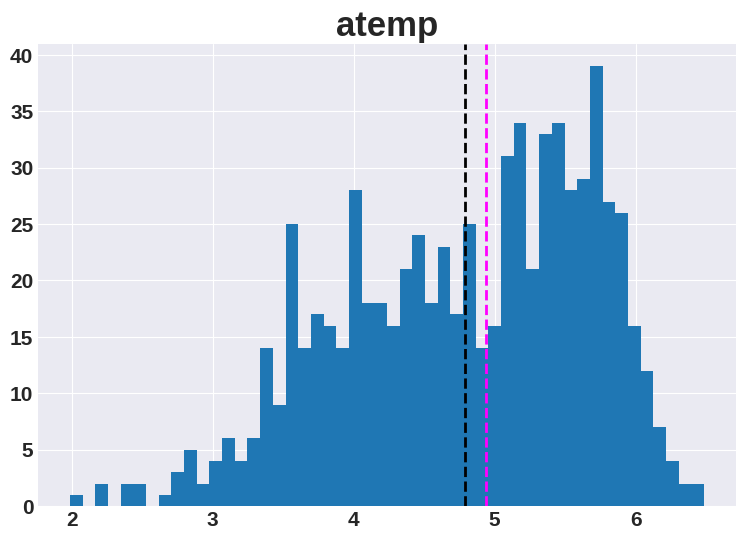

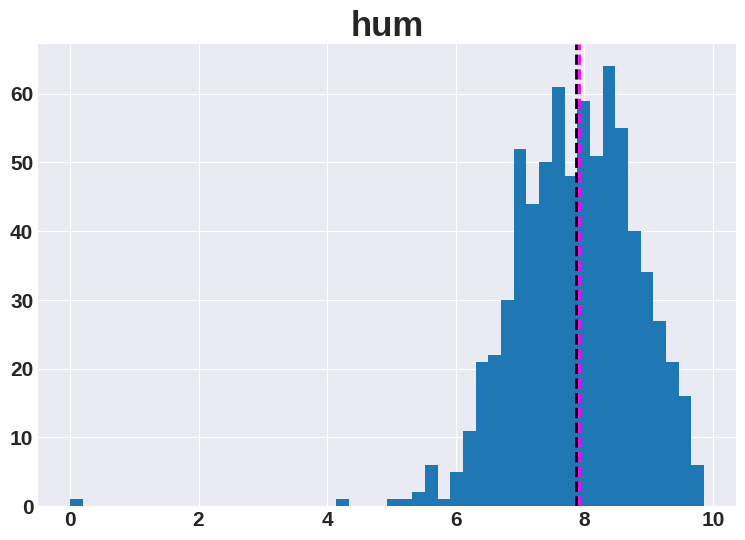

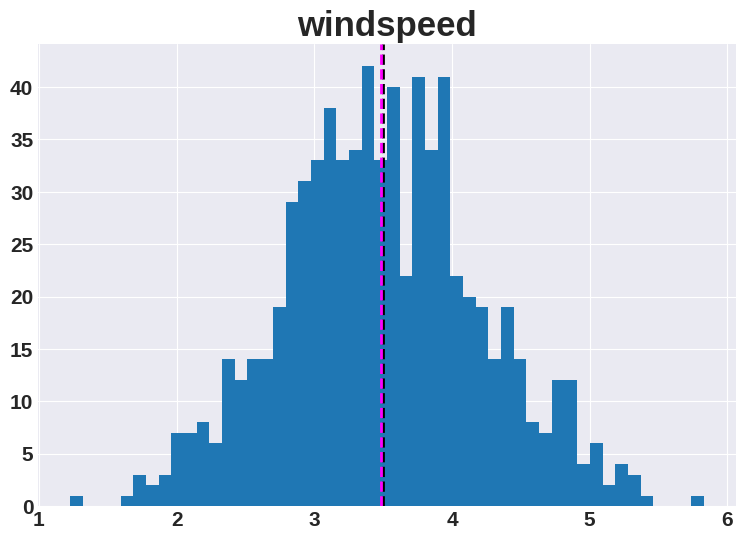

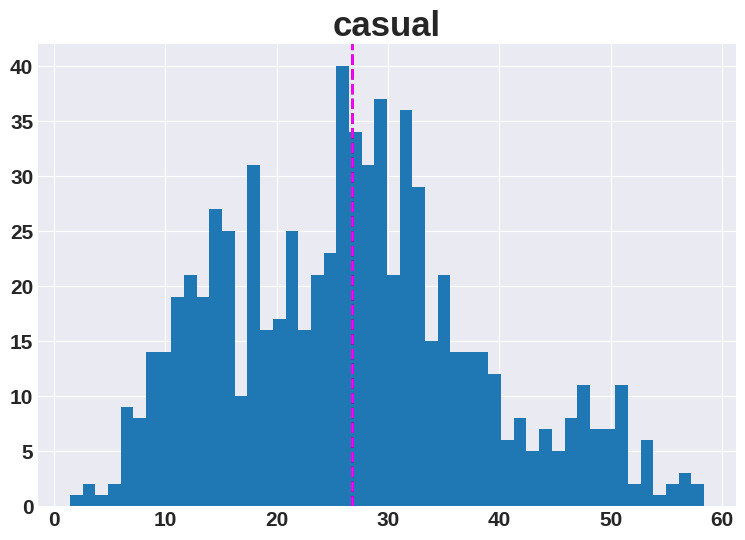

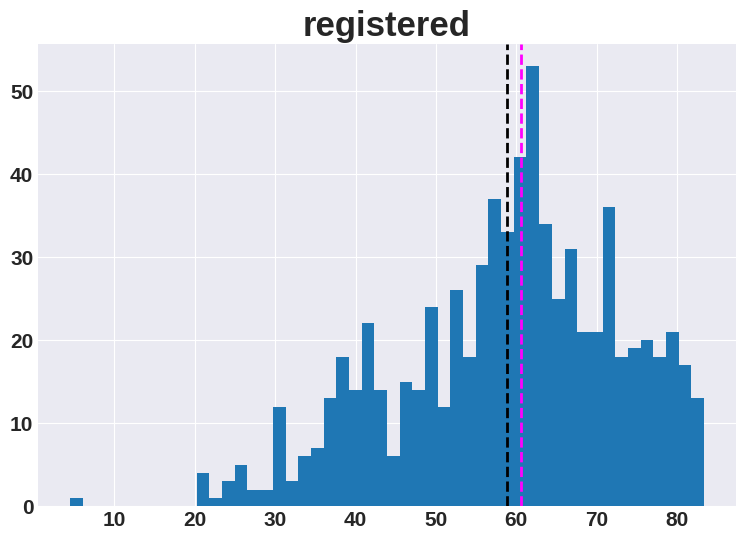

In [34]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

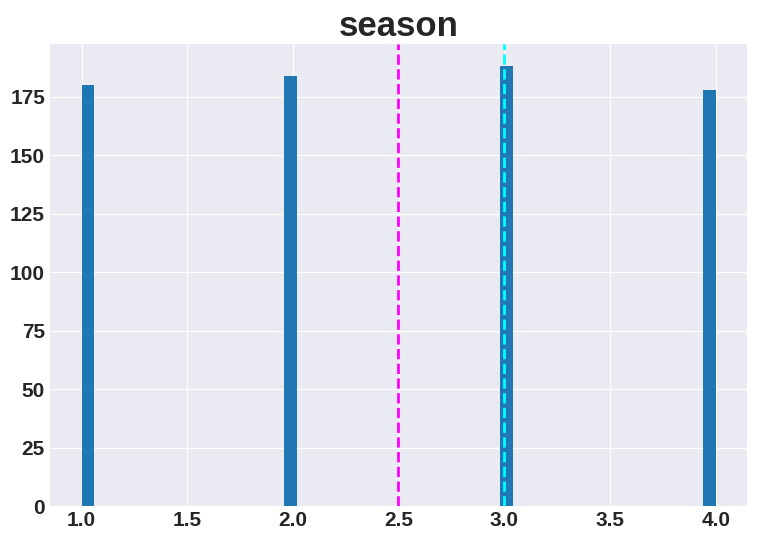

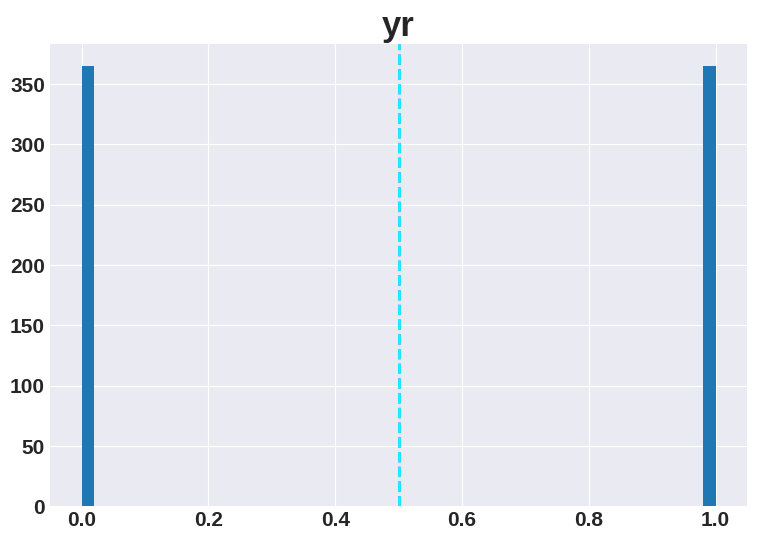

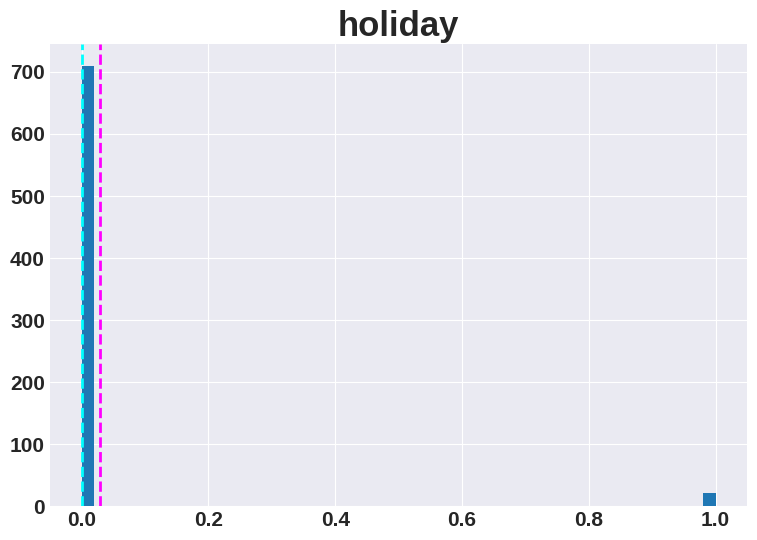

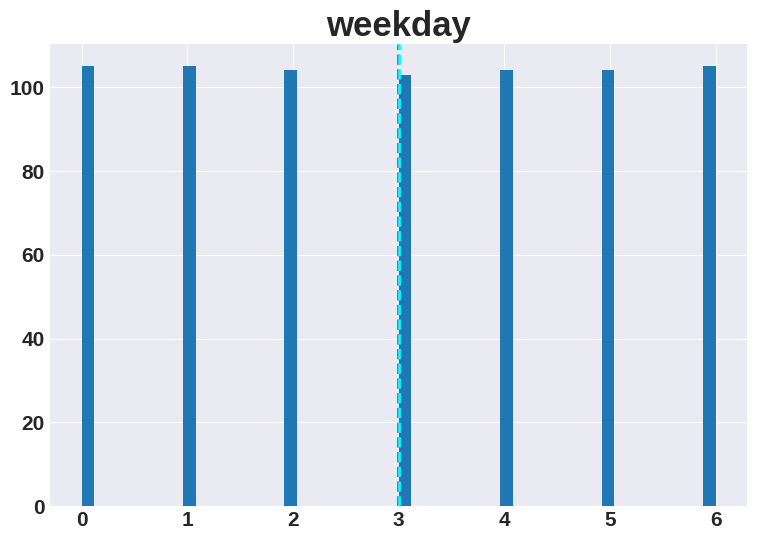

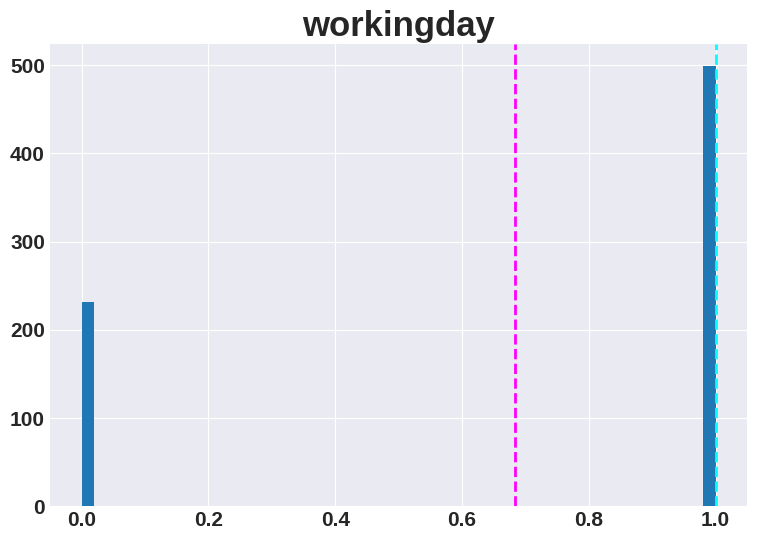

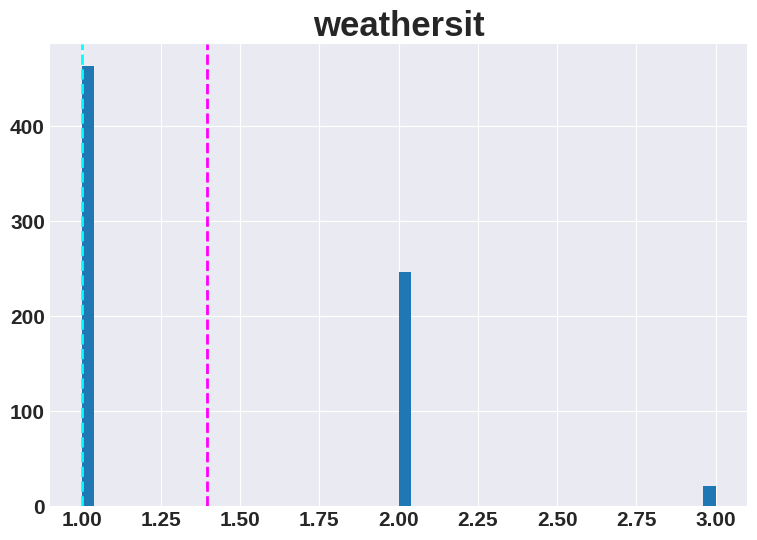

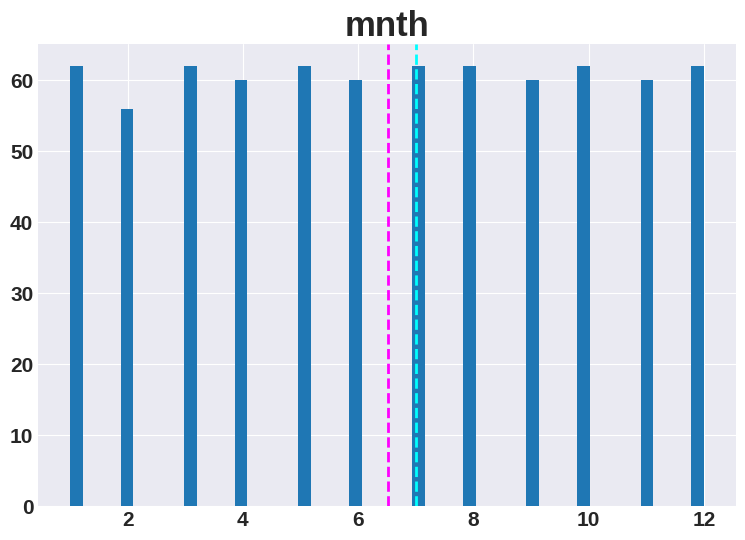

In [35]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

# Bivariate Analysis

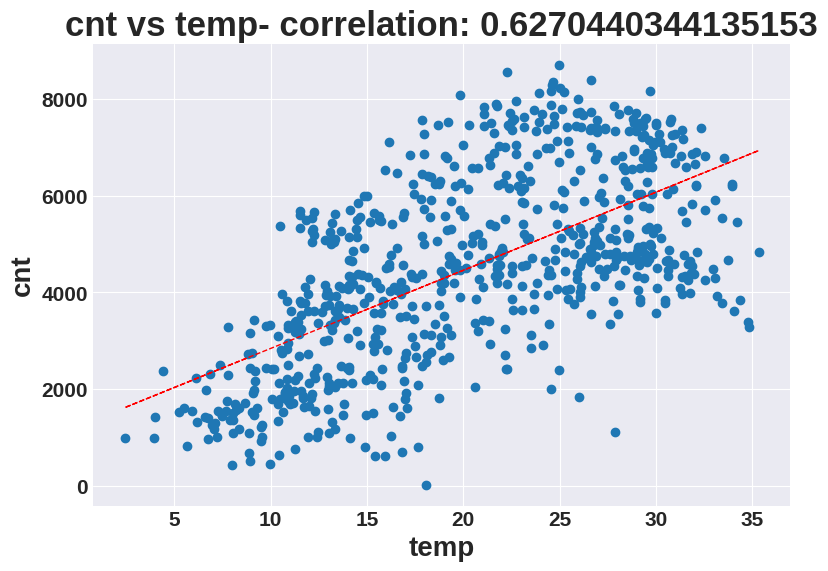

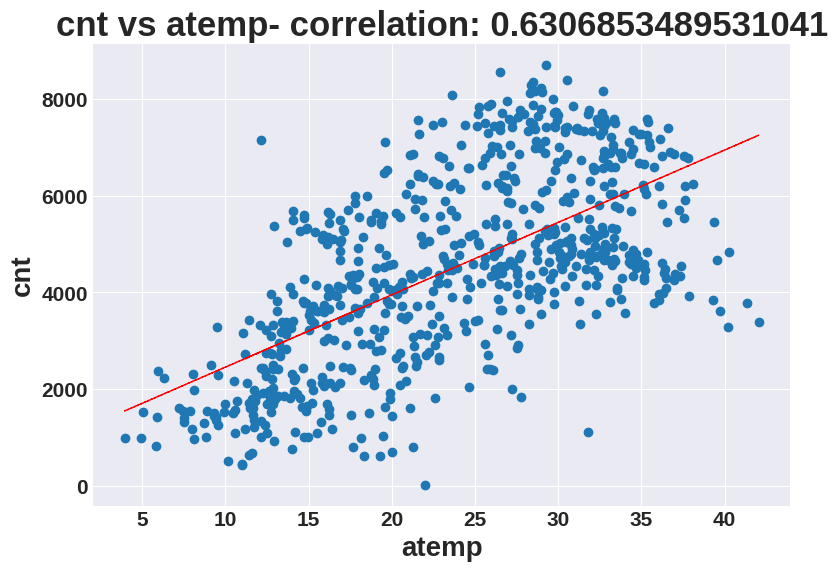

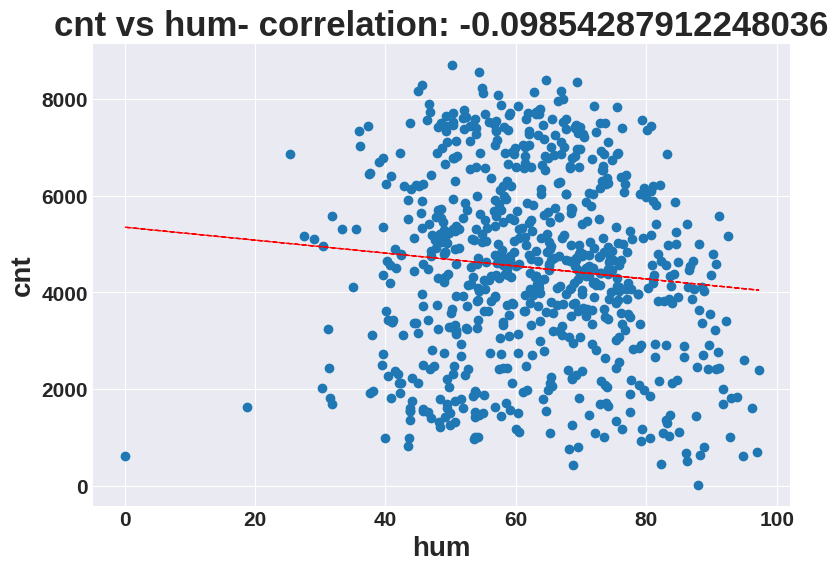

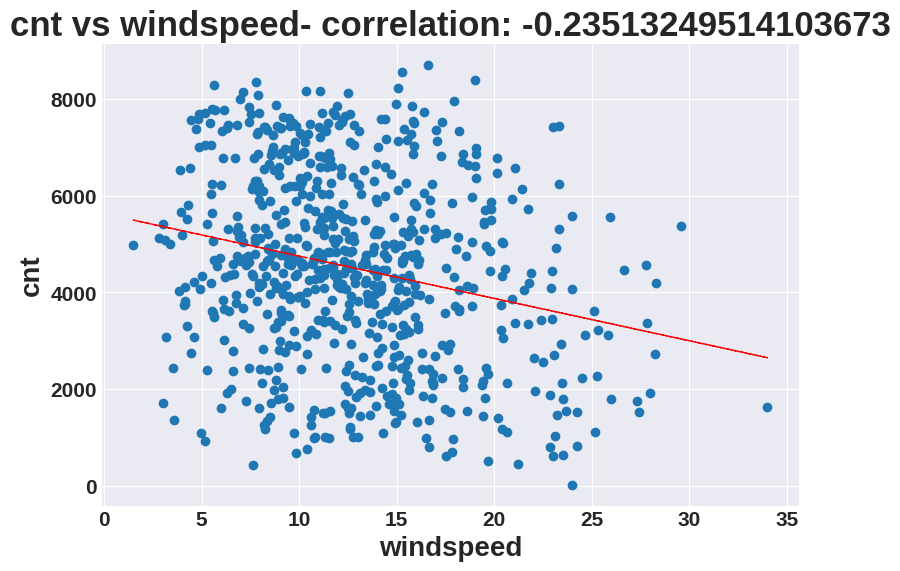

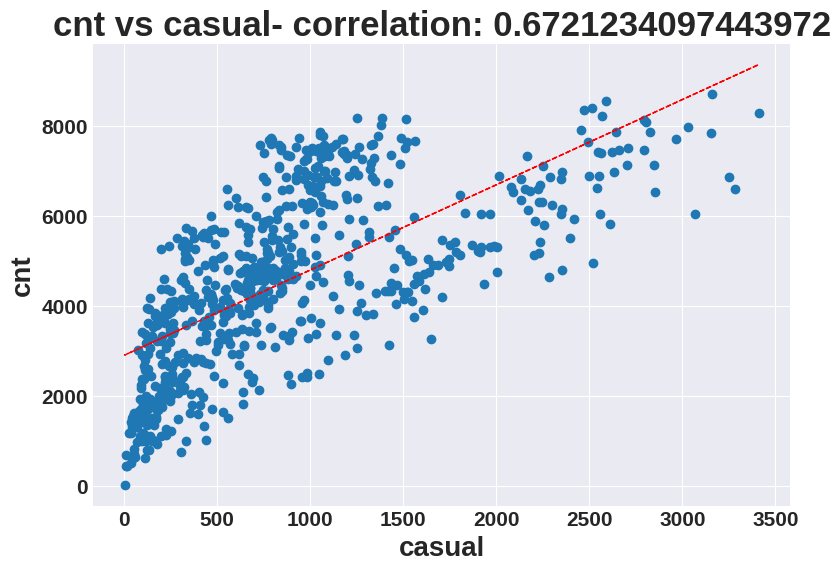

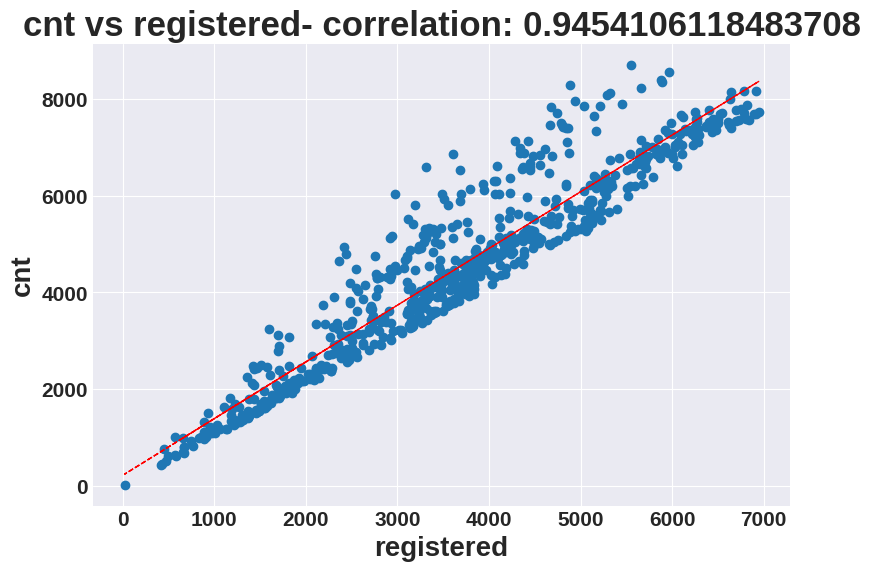

In [36]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('cnt vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['cnt'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

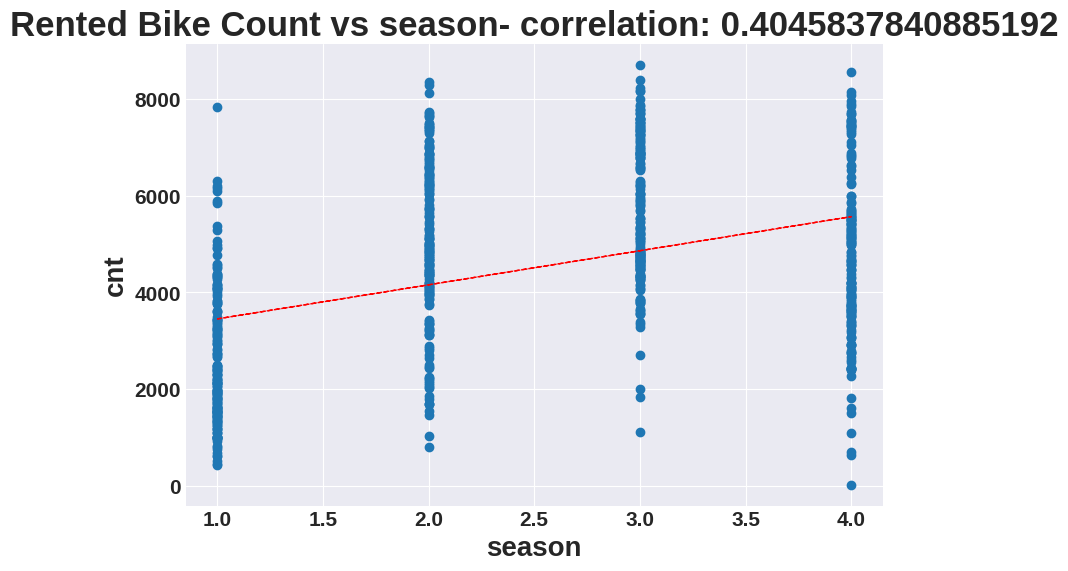

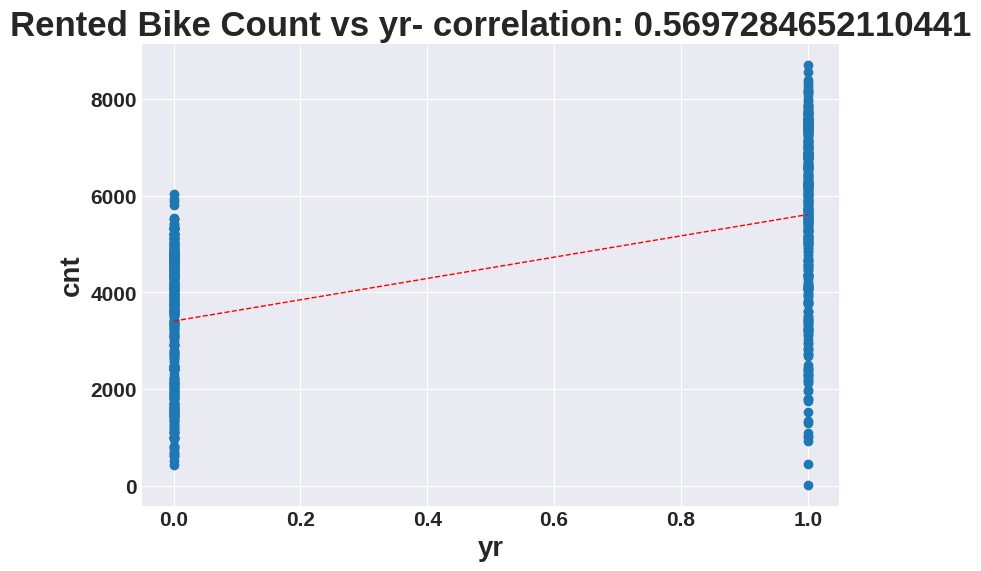

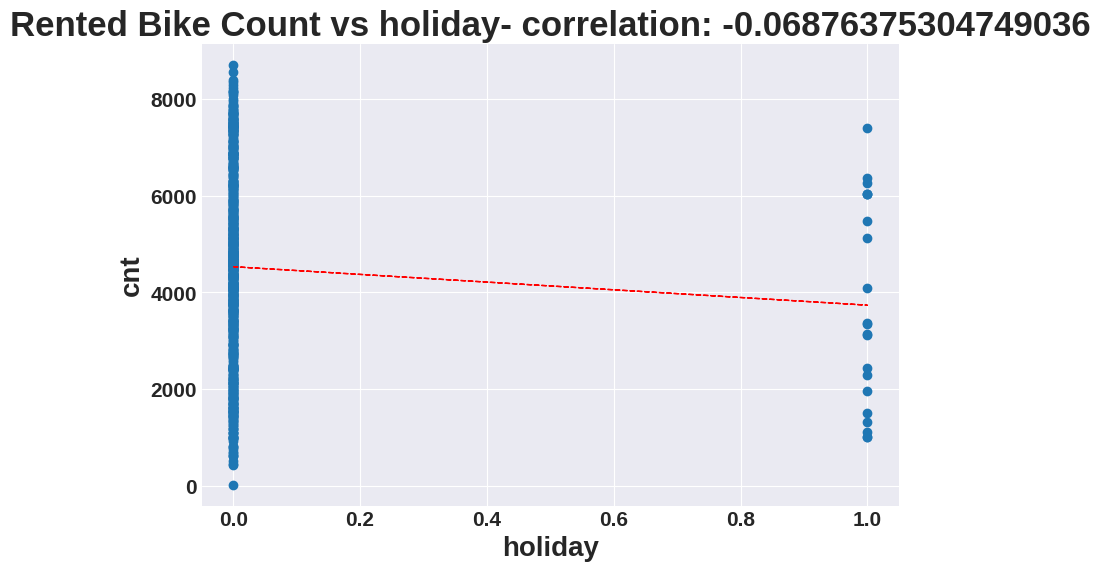

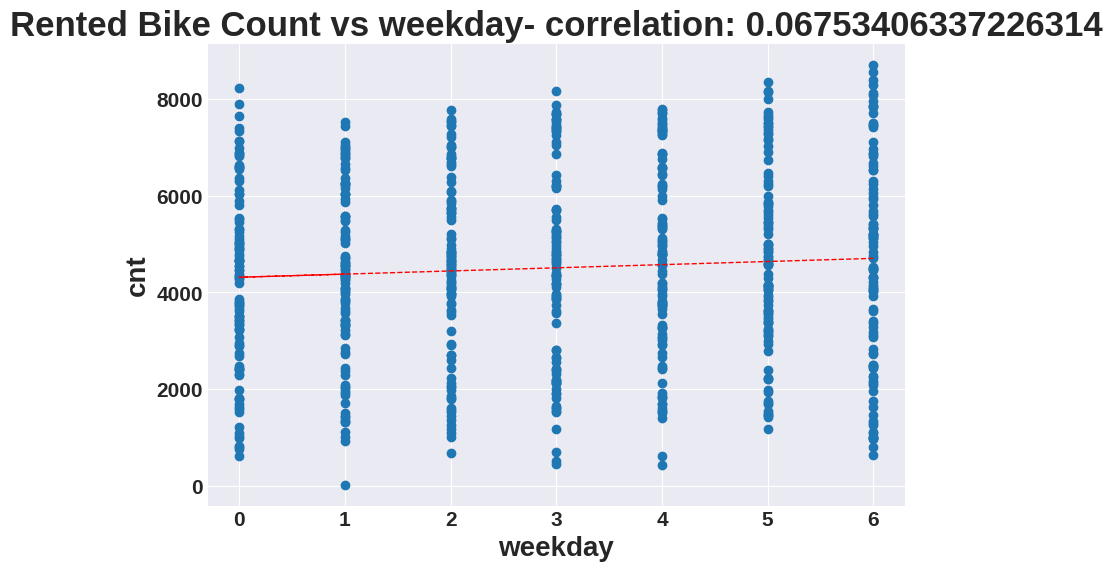

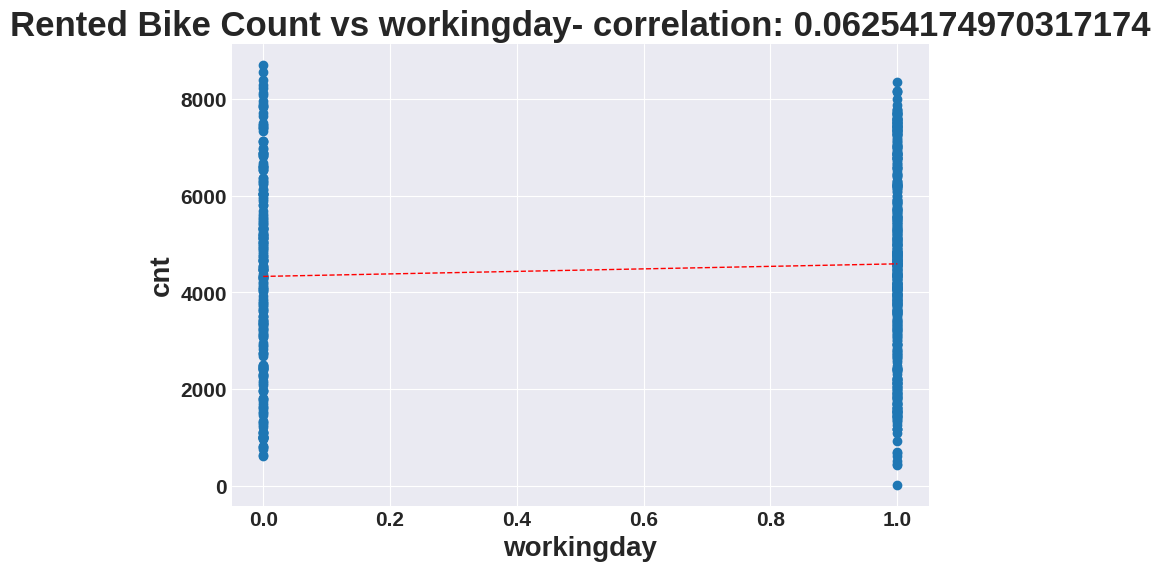

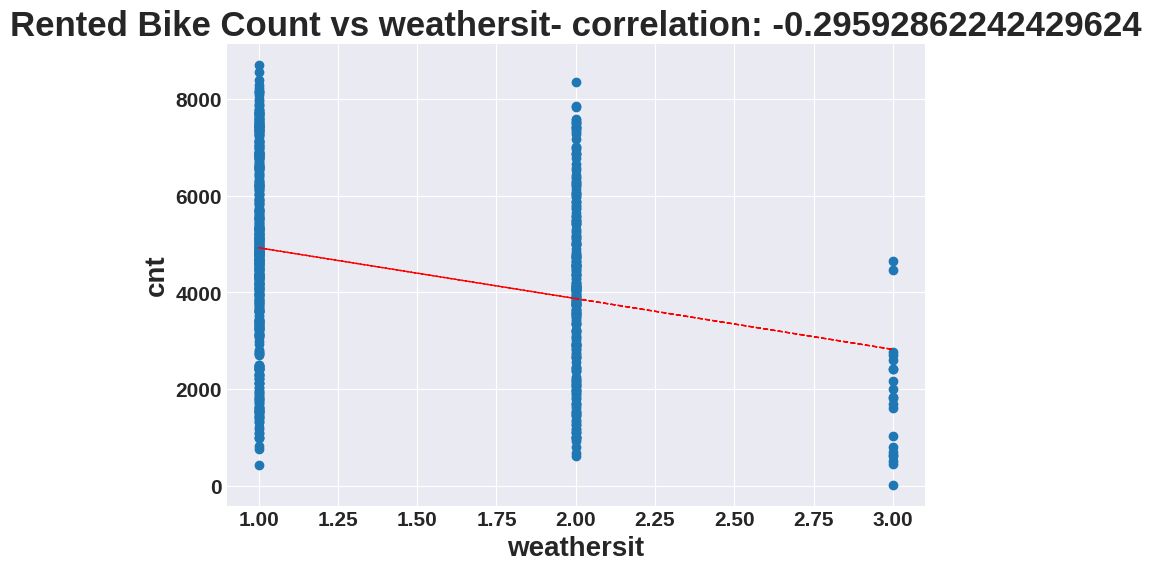

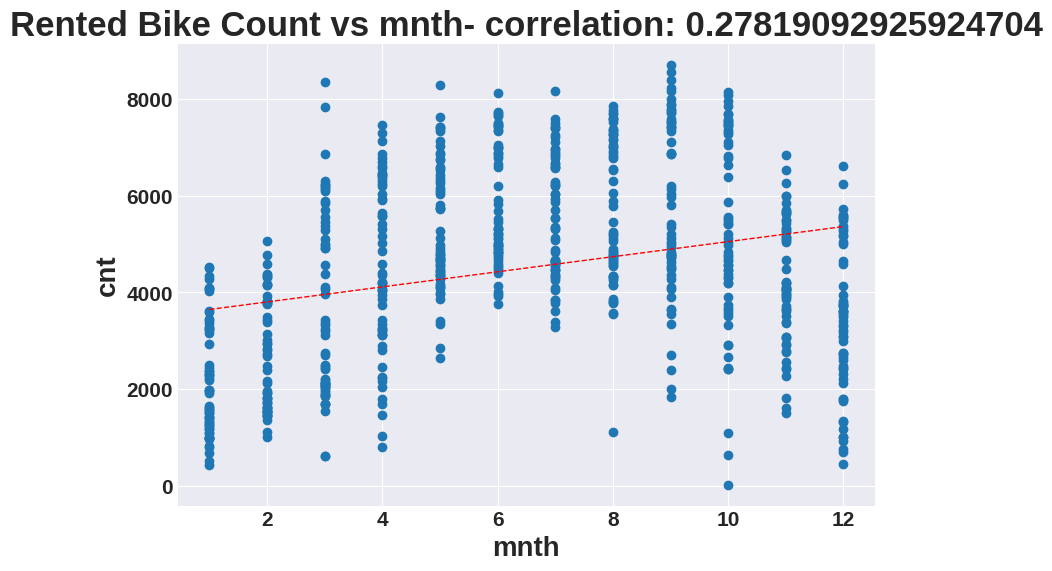

In [37]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['cnt'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

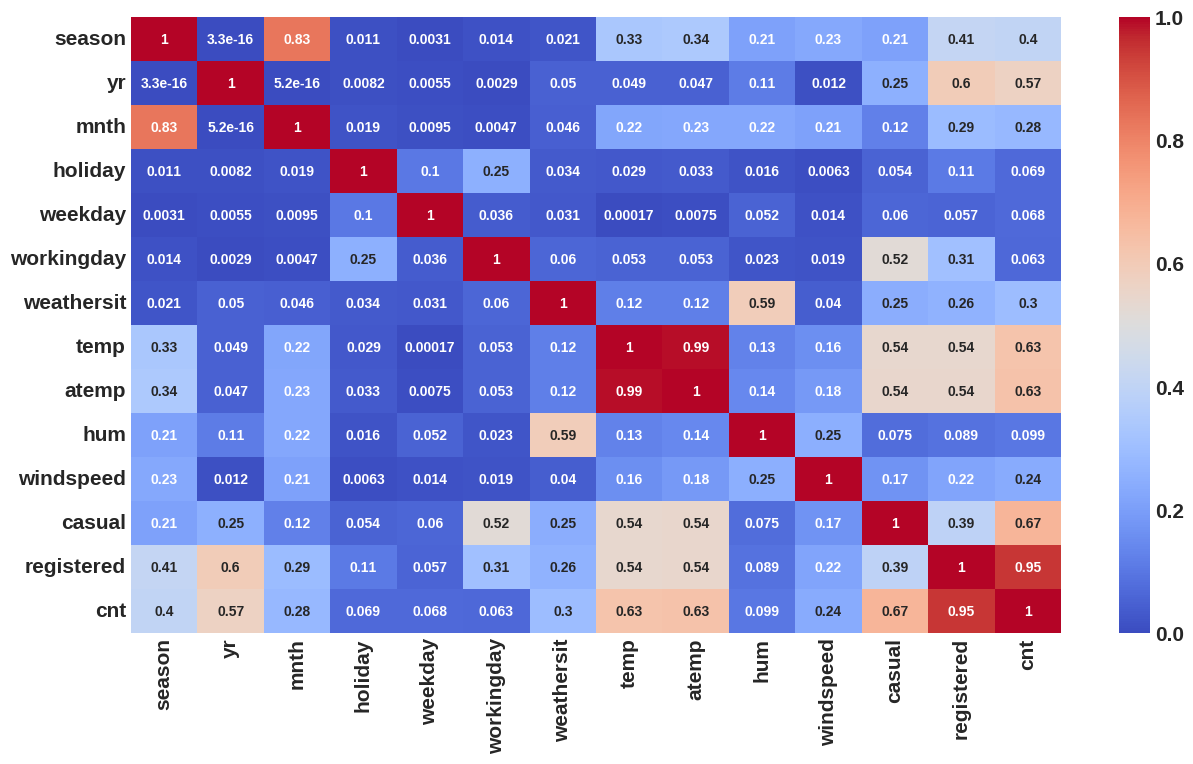

In [38]:
## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [39]:
# Make copy of dataset
df = dataset.copy()

In [40]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


#**Obseravations:**

-> Peak Demand Times: Bike usage is highest during morning and evening hour matching daily commute patterns.

-> Weekly Trends: Demand is higher on working days compared to weekends and holidays.

-> Seasonal Impact: Warmer seasons (spring and summer) show higher bike demand, while colder months see a drop.

-> Weather Influence: Clear and pleasant weather increases rides, while rain, humidity, and wind reduce usage.

-> Data Insights: The dataset is clean and ready for modeling, with features like season, weather, and temperature strongly influencing demand.

-> Key Takeaway: Bike-sharing demand depends on a mix of time, weather, and seasonal factors—insights that can help in efficient resource planning and operations.

# Modeling

In [41]:
#Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [42]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,season,24.816777
1,yr,5.533413
2,mnth,15.372000
3,holiday,1.107278
4,weekday,3.260225
5,workingday,9.458338
6,weathersit,14.459583
7,temp,493.310559
8,atemp,571.718937
9,hum,28.077524


In [43]:
df = df.drop(['atemp','registered','casual','hum'],axis=1)

In [44]:
df['season'].value_counts()

,count
season,
3,188
2,184
1,180
4,178


In [74]:
season_dummies = pd.get_dummies(df['season'], prefix='season', drop_first=True)
df = pd.concat([df, season_dummies], axis=1)
df = df.drop(columns = ['season'])

In [75]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.003353
1,mnth,3.959612
2,holiday,1.074923
3,weekday,2.835438
4,workingday,2.932090
5,weathersit,4.999764
6,temp,1.088366
7,windspeed,1.056904


In [76]:
#standardise continuous features

from sklearn.preprocessing import StandardScaler

num_cols = ['temp', 'windspeed', 'yr']  # numeric columns in final features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

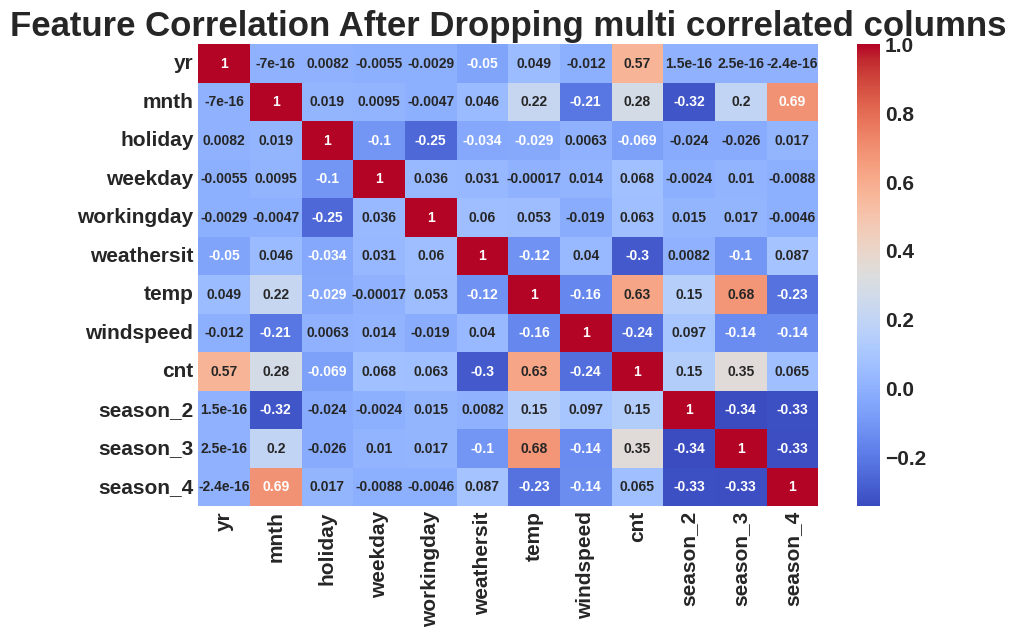

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation After Dropping multi correlated columns")
plt.show()

In [78]:
df.head(1)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,cnt,season_2,season_3,season_4
0,-1.0,1,0,6,0,2,-0.827613,-0.387833,985,False,False,False


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    float64
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   windspeed   730 non-null    float64
 8   cnt         730 non-null    int64  
 9   season_2    730 non-null    bool   
 10  season_3    730 non-null    bool   
 11  season_4    730 non-null    bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 53.6 KB


# **Linear Regression**

In [80]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
dependent_variable = 'cnt'

In [82]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['temp',
 'holiday',
 'season_3',
 'season_4',
 'weekday',
 'workingday',
 'yr',
 'weathersit',
 'mnth',
 'season_2',
 'windspeed']

In [83]:
y = np.sqrt(df['cnt'])

X = df.drop('cnt',axis=1)

In [84]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [85]:
X_train[0:10]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,season_2,season_3,season_4
239,-1.0,8,0,0,0,1,1.155777,1.473059,False,True,False
97,-1.0,4,0,5,1,2,-0.873163,0.470861,True,False,False
503,1.0,5,0,6,0,1,0.570645,-1.374597,True,False,False
642,1.0,10,0,5,1,1,0.652627,-1.085875,False,False,True
498,1.0,5,0,1,1,2,0.424896,0.286337,True,False,False
303,-1.0,10,0,1,1,1,-0.850388,-1.085875,False,False,True
570,1.0,7,0,3,1,1,1.249281,-0.331650,False,True,False
250,-1.0,9,0,4,1,3,0.755997,0.028985,False,True,False
17,-1.0,1,0,2,1,2,-1.524466,-0.564240,False,False,False
595,1.0,8,0,0,0,2,0.766490,-1.342660,False,True,False


In [86]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 11)
(584,)
(146, 11)
(146,)


In [88]:
X_train[0:10]

array([[0.        , 0.63636364, 0.        , 0.        , 0.        ,
        0.        , 0.80735084, 0.65710461, 0.        , 1.        ,
        0.        ],
       [0.        , 0.27272727, 0.        , 0.83333333, 1.        ,
        0.5       , 0.34478502, 0.46257665, 1.        , 0.        ,
        0.        ],
       [1.        , 0.36363636, 0.        , 1.        , 0.        ,
        0.        , 0.67395007, 0.1043704 , 1.        , 0.        ,
        0.        ],
       [1.        , 0.81818182, 0.        , 0.83333333, 1.        ,
        0.        , 0.69264081, 0.16041174, 0.        , 0.        ,
        1.        ],
       [1.        , 0.36363636, 0.        , 0.16666667, 1.        ,
        0.5       , 0.64072168, 0.42676029, 1.        , 0.        ,
        0.        ],
       [0.        , 0.81818182, 0.        , 0.16666667, 1.        ,
        0.        , 0.34997731, 0.16041174, 0.        , 0.        ,
        1.        ],
       [1.        , 0.54545455, 0.        , 0.5       , 1.

In [89]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [90]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred = regressor.predict(X_test)

In [91]:
# Evaluation of test data set

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 41.16752787636722
RMSE : 6.416192630865069
MAE : 4.9145947444067355
R2 : 0.8616817741003588


In [92]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE': {round(MSE,4)}, 'RMSE': {round(RMSE,4)}, 'MAE': {round(MAE,4)}, 'R2': {round(R2,4)}]")

In [93]:
get_metrics(y_test,y_pred,"Linear Regression")

Linear Regression : ['MSE': 41.1675, 'RMSE': 6.4162, 'MAE': 4.9146, 'R2': 0.8617]


# **Train Multiple Models**

In [94]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [95]:
rir = Ridge().fit(X_train,y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train,y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_r = LinearRegression().fit(X_train_poly,y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

knn = KNeighborsRegressor().fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

gbr = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

xgb = XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)


In [104]:
get_metrics(y_test,y_pred,"Linear Regression")
get_metrics(y_test,y_pred,"Ridge")
get_metrics(y_test,y_pred_lar,"Lasso")
get_metrics(y_test,y_pred_poly,"Polynomial")
get_metrics(y_test,y_pred_svr,"SVR")
get_metrics(y_test,y_pred_knn,"KNN")
get_metrics(y_test,y_pred_dtr,"Decision Tree")
get_metrics(y_test,y_pred_rfr,"Random Forest")
get_metrics(y_test,y_pred_gbr,"Gradient Boosting")
get_metrics(y_test,y_pred_xgb,"XGBoost")

Linear Regression : ['MSE': 41.1675, 'RMSE': 6.4162, 'MAE': 4.9146, 'R2': 0.8617]
Ridge : ['MSE': 41.1675, 'RMSE': 6.4162, 'MAE': 4.9146, 'R2': 0.8617]
Lasso : ['MSE': 139.5167, 'RMSE': 11.8117, 'MAE': 9.4773, 'R2': 0.5312]
Polynomial : ['MSE': 33.2876, 'RMSE': 5.7695, 'MAE': 4.2442, 'R2': 0.8882]
SVR : ['MSE': 88.8229, 'RMSE': 9.4246, 'MAE': 6.8542, 'R2': 0.7016]
KNN : ['MSE': 77.9581, 'RMSE': 8.8294, 'MAE': 6.0143, 'R2': 0.7381]
Decision Tree : ['MSE': 59.0796, 'RMSE': 7.6863, 'MAE': 5.0151, 'R2': 0.8015]
Random Forest : ['MSE': 37.5422, 'RMSE': 6.1272, 'MAE': 4.276, 'R2': 0.8739]
Gradient Boosting : ['MSE': 35.4295, 'RMSE': 5.9523, 'MAE': 4.1915, 'R2': 0.881]
XGBoost : ['MSE': 41.8643, 'RMSE': 6.4703, 'MAE': 4.5544, 'R2': 0.8593]


#Visualization of Model Predictions

Text(0.5, 1.0, 'Linear Regression Actual vs Predicted Values')

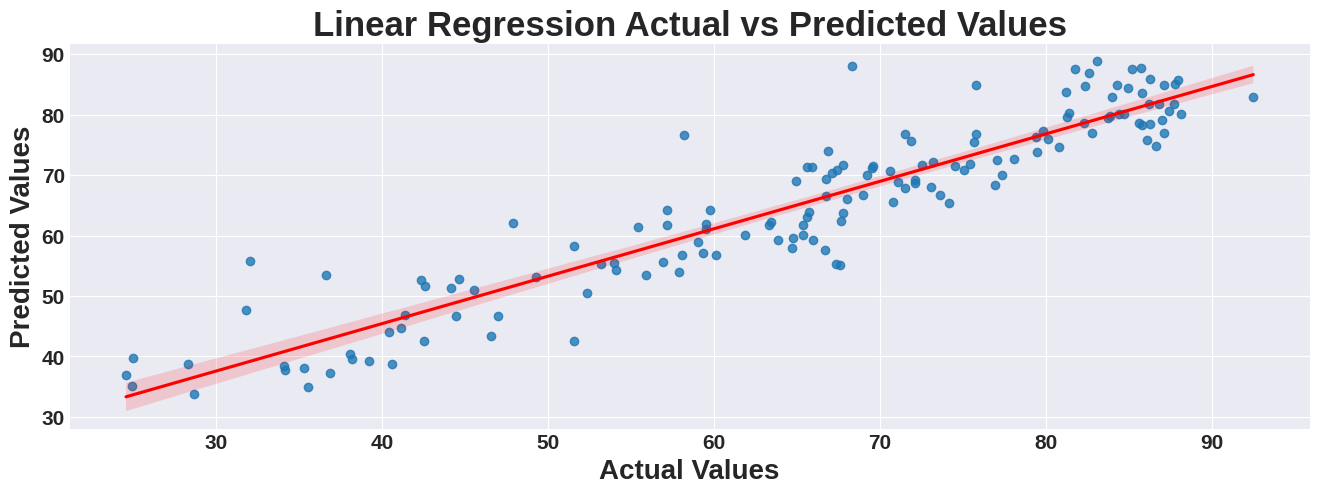

In [124]:
# # Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Actual vs Predicted Values")

Text(0.5, 1.0, 'Ridge Regression Actual vs Predicted Values')

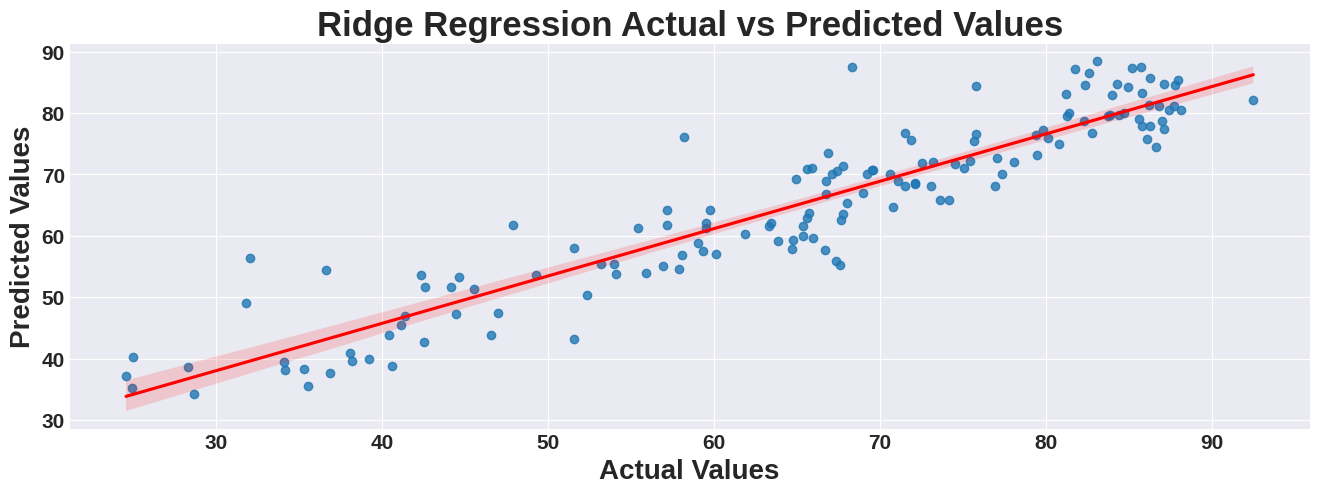

In [133]:
plot_scatter(y_pred_rir,y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression Actual vs Predicted Values")

Text(0.5, 1.0, 'Lasso Regression Actual vs Predicted Values')

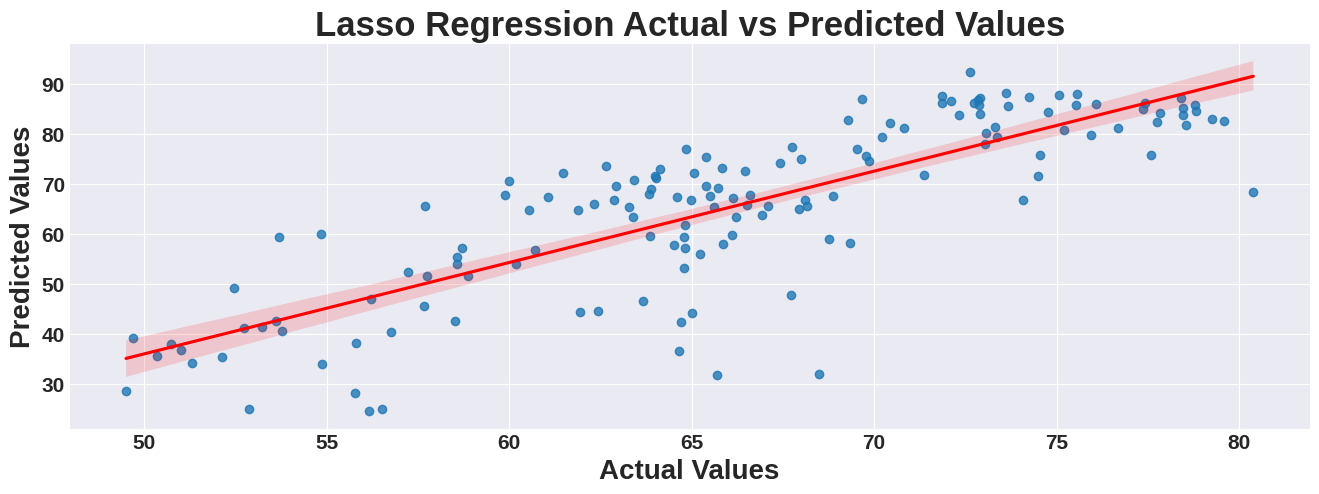

In [128]:
plot_scatter(y_test,y_pred_lar)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression Actual vs Predicted Values")

Text(0.5, 1.0, 'Polynomial Regression Actual vs Predicted Values')

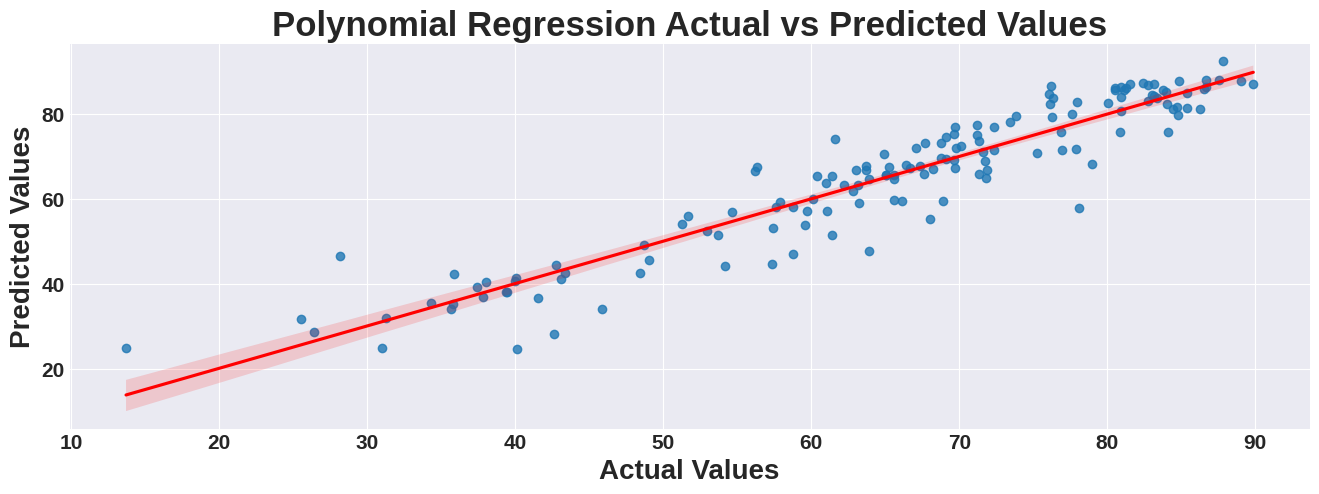

In [125]:
plot_scatter(y_test,y_pred_poly)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression Actual vs Predicted Values")

Text(0.5, 1.0, 'SVR Regression Actual vs Predicted Values')

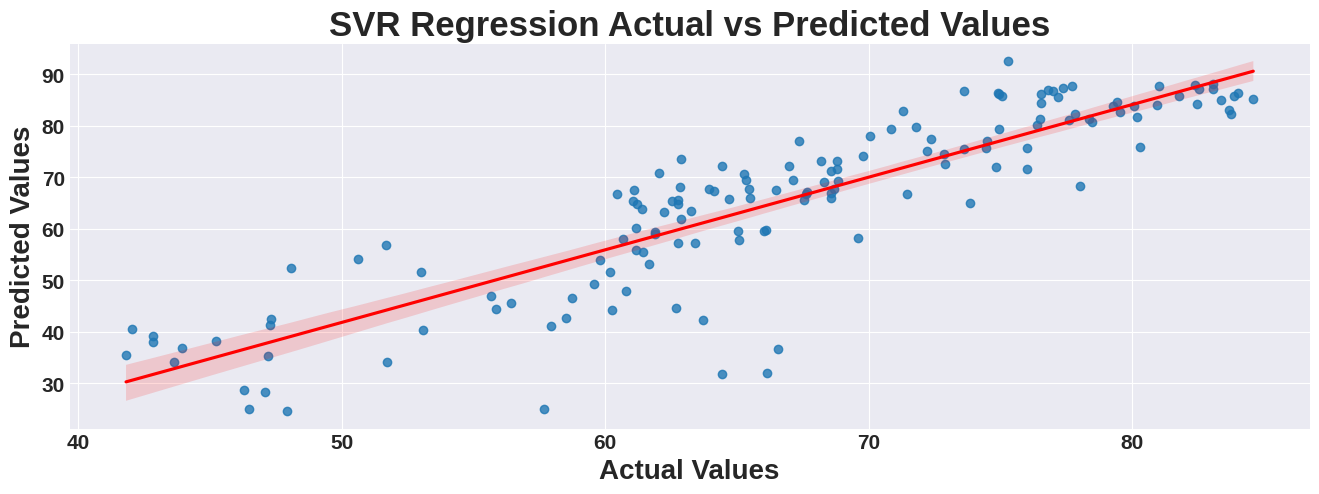

In [129]:
plot_scatter(y_test,y_pred_svr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR Regression Actual vs Predicted Values")

Text(0.5, 1.0, 'KNN Regression Actual vs Predicted Values')

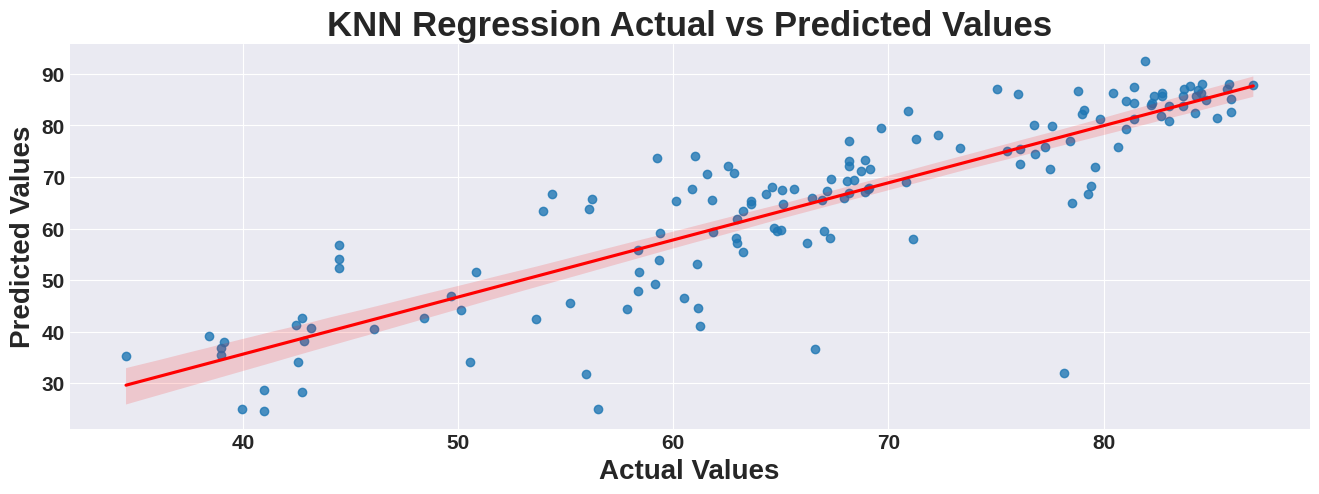

In [130]:
plot_scatter(y_test,y_pred_knn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression Actual vs Predicted Values")

Text(0.5, 1.0, 'Decision Tree Regression Actual vs Predicted Values')

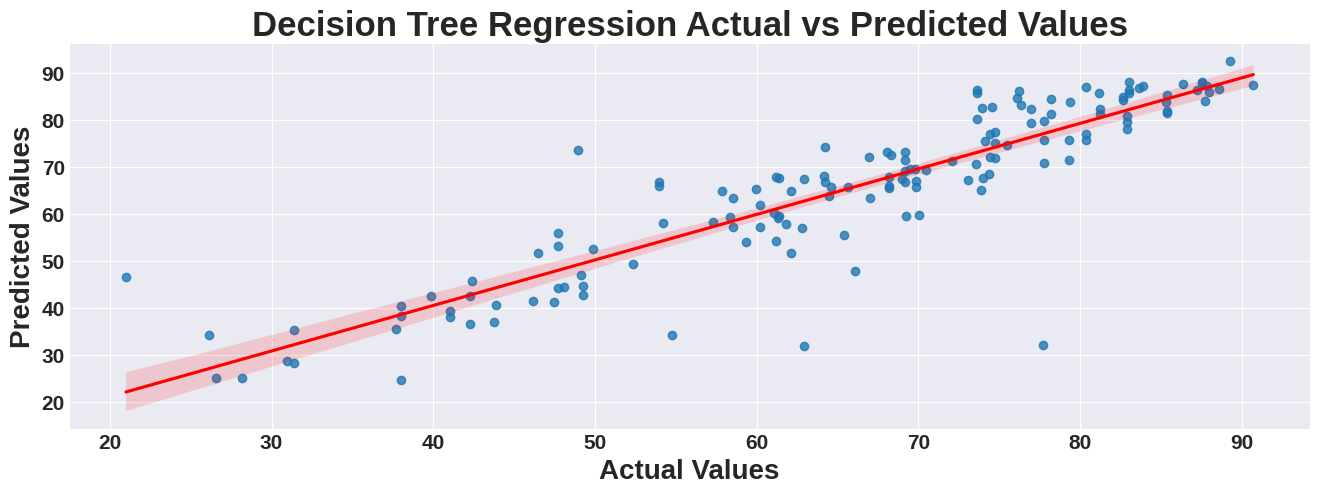

In [131]:
plot_scatter(y_test,y_pred_dtr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression Actual vs Predicted Values")

Text(0.5, 1.0, 'Random Forest Regression Actual vs Predicted Values')

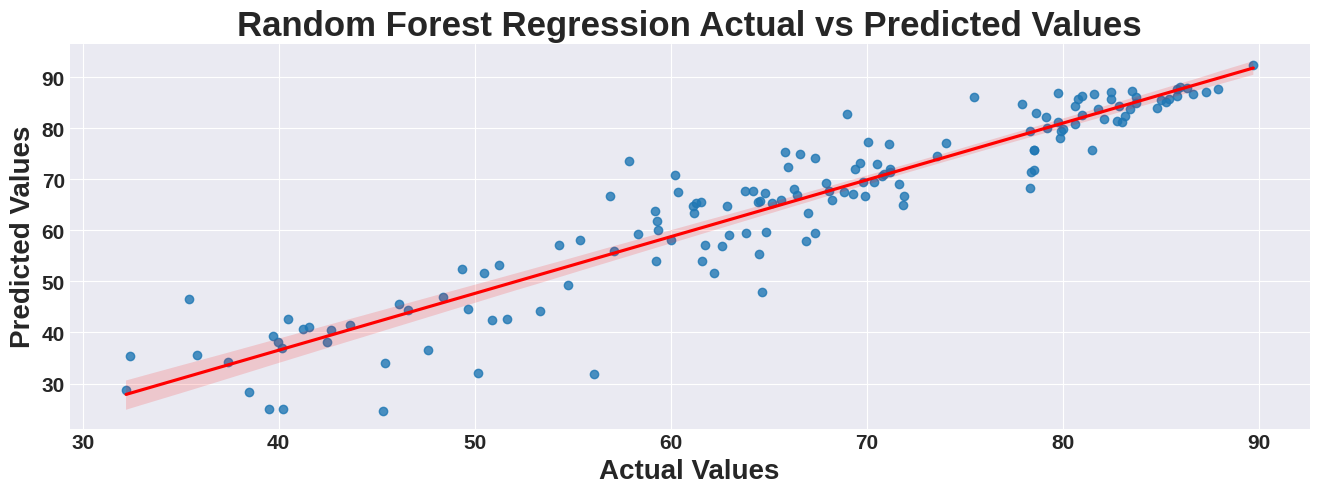

In [126]:
plot_scatter(y_test,y_pred_rfr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression Actual vs Predicted Values")

Text(0.5, 1.0, 'Gradient Boosting Regression Actual vs Predicted Values')

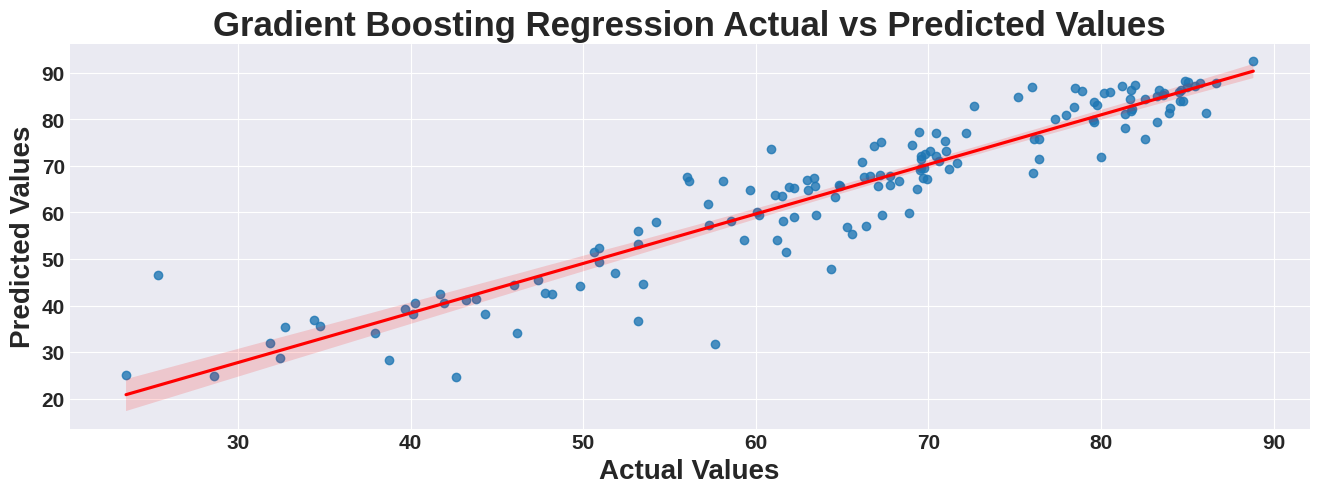

In [127]:
plot_scatter(y_test,y_pred_gbr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regression Actual vs Predicted Values")

Text(0.5, 1.0, 'XGBoost Regression Actual vs Predicted Values')

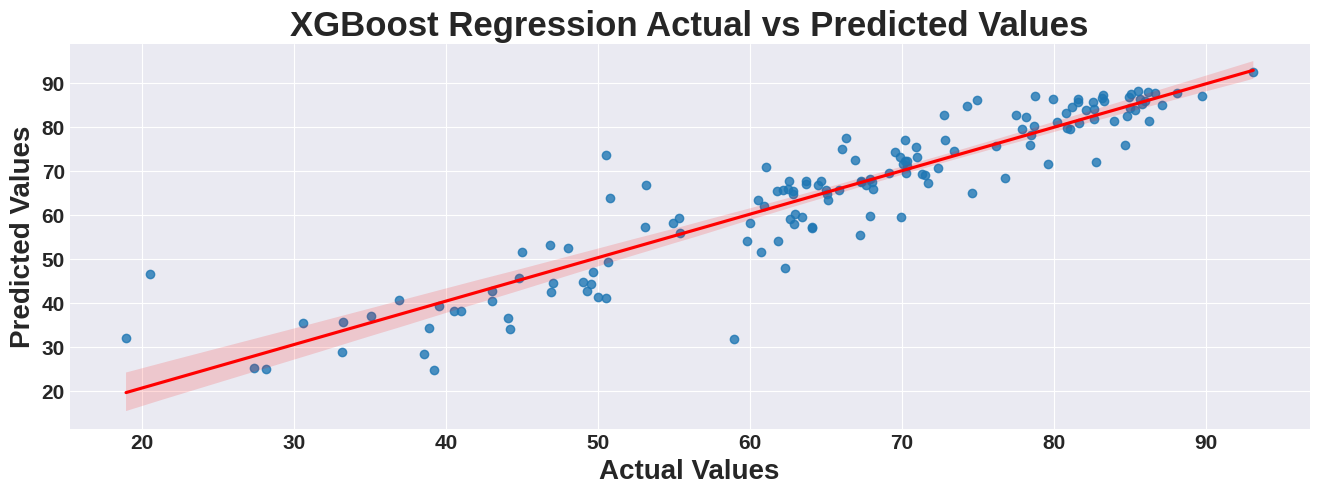

In [132]:
plot_scatter(y_test,y_pred_xgb)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regression Actual vs Predicted Values")

1. Best Performing Model:
The Polynomial Regression model gives the highest R² value (0.8882) with lowest MSE and RMSE (33.28, 5.76), indicating it fits the data best and captures non-linear relationships effectively.


2. Strong Ensemble Models:
Gradient Boosting (R² = 0.881) and Random Forest (R² = 0.8739) also perform very well with low error values, showing that ensemble techniques handle complex patterns better than simple regression models.


3. Moderate Models:
Linear Regression and Ridge Regression perform moderately well with similar metrics (R² ≈ 0.86), suggesting the data is reasonably linear, but could benefit from non-linear modeling.


4. Weak Performing Models:
Lasso Regression (R² = 0.53) and SVR (R² = 0.70) show comparatively poor performance, indicating that they fail to capture the underlying trend of the dataset effectively.